# Q1. Business Case: Delhivery - Feature Engineering

Column Profiling:

1. data - tells whether the data is testing or training data

2. trip_creation_time – Timestamp of trip creation

3. route_schedule_uuid – Unique Id for a particular route schedule

4. route_type – Transportation type

5. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way

6. Carting: Handling system consisting of small vehicles (carts)

7. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)

8. source_center - Source ID of trip origin

9. source_name - Source Name of trip origin

10. destination_cente – Destination ID

11. destination_name – Destination Name

12. od_start_time – Trip start time

13. od_end_time – Trip end time

14. start_scan_to_end_scan – Time taken to deliver from source to destination

15. is_cutoff – Unknown field

16. cutoff_factor – Unknown field

17. cutoff_timestamp – Unknown field

18. actual_distance_to_destination – Distance in Kms between source and destination warehouse

19. actual_time – Actual time taken to complete the delivery (Cumulative)

20. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

21. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

22. factor – Unknown field

23. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery

24. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery

25. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery

26. segment_factor – Unknown field

In [3]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
from scipy.stats import ttest_rel

from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import expon
from scipy import stats as st
from statsmodels.stats.weightstats import ztest
import math
import scipy.stats as stats


from scipy.stats import ttest_ind
from scipy.stats import chi2, chi2_contingency, chisquare, f_oneway, f

# 1. Import, Observations, Shape and Change data types if needed

In [4]:
data = pd.read_csv('delhivery_data.csv')
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
data.shape

(144867, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [7]:
#  CONVRT TO DATETIME
data['trip_creation_time'] =  pd.to_datetime(data['trip_creation_time'], infer_datetime_format=True)
data['cutoff_timestamp'] =  pd.to_datetime(data['cutoff_timestamp'], infer_datetime_format=True)
data['od_start_time'] =  pd.to_datetime(data['od_start_time'], infer_datetime_format=True)
data['od_end_time'] =  pd.to_datetime(data['od_end_time'], infer_datetime_format=True)

# #  CONVRT TO int
# df['start_scan_to_end_scan'] = df['start_scan_to_end_scan'].astype(int)
# df['actual_time'] = df['actual_time'].astype(int)
# df['osrm_time'] = df['osrm_time'].astype(int)
# df['segment_actual_time'] = df['segment_actual_time'].astype(int)
# df['segment_osrm_time'] = df['segment_osrm_time'].astype(int)
# df['segment_actual_time'] = df['segment_actual_time'].astype(int)
# df['segment_osrm_time'] = df['segment_osrm_time'].astype(int)

# #  CONVRT TO float
# df['actual_distance_to_destination'] = df['actual_distance_to_destination'].astype(float)
# df['osrm_distance'] = df['osrm_distance'].astype(float)
# df['factor'] = df['factor'].astype(float)
# df['segment_osrm_distance'] = df['segment_osrm_distance'].astype(float)
# df['segment_factor'] = df['segment_factor'].astype(float)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [9]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [10]:
data[data['source_name'].isnull()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144484,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:54:08,45.134384,62.0,45.0,47.7734,1.377778,34.0,23.0,23.6601,1.478261
144485,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:30:09,66.542266,86.0,71.0,71.9549,1.211268,23.0,25.0,24.1815,0.920000
144486,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 20:00:08,88.143957,116.0,114.0,112.6943,1.017544,30.0,43.0,40.7394,0.697674
144487,test,2018-10-03 09:06:06.690094,thanos::sroute:cbef3b6a-79ea-4d5e-a215-b558a70...,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,...,2018-10-03 19:02:11,111.084417,173.0,123.0,134.1940,1.406504,57.0,45.0,46.9217,1.266667


In [11]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [12]:
data['trip_uuid'].value_counts()

trip-153811219535896559    101
trip-153846035308581166    101
trip-153802363942560700    101
trip-153759210483476123    101
trip-153819749763881430    101
                          ... 
trip-153807169820740041      1
trip-153815586768995663      1
trip-153823299365493206      1
trip-153733174477629450      1
trip-153694467298919626      1
Name: trip_uuid, Length: 14817, dtype: int64

# Aggregating the data

### Level -1 Groupin gsegment information 

In [13]:
data.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.43566,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727


In [14]:
df_lv1 = data.groupby(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name','od_start_time', 'od_end_time'], 
            as_index=False).agg(start_scan_to_end_scan_last=('start_scan_to_end_scan', 'last'),
                        is_cutoff_last=('is_cutoff', 'last'),
                        cutoff_factor_last=('cutoff_factor', 'last'),
                        cutoff_factor_first=('cutoff_factor', 'first'),
                        actual_distance_to_destination_last=('actual_distance_to_destination', 'last'),
                        actual_time_last=('actual_time', 'last'),
                        osrm_time_last=('osrm_time', 'last'),
                        osrm_distance_last=('osrm_distance', 'last'),
                   #GET sum FOR SEGMENT DATA             
                        segment_actual_time_sum=('segment_actual_time', 'sum'),
                        segment_osrm_time_sum=('segment_osrm_time', 'sum'),
                        segment_osrm_distance_sum=('segment_osrm_distance', 'sum'),
                        segment_factor_last=('segment_factor', 'last'),
                        segment_count=('destination_center', 'count'))
df_lv1.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_factor_first,actual_distance_to_destination_last,actual_time_last,osrm_time_last,osrm_distance_last,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,segment_factor_last,segment_count
0,test,2018-09-27 00:02:18.970980,thanos::sroute:a02b2c7d-49c4-4c7f-956e-b4b22a1...,Carting,trip-153800653897073708,IND424006AAA,Dhule_MIDCAvdn_I (Maharashtra),IND424101AAA,Chalisgaon_BhadgDPP_D (Maharashtra),2018-09-27 00:02:18.970980,...,9,49.557160,128.0,40.0,56.8745,126.0,47.0,67.4925,7.500000,7
1,test,2018-09-27 00:02:29.352390,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153800654935210748,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-27 00:02:29.352390,...,9,17.774611,58.0,17.0,21.7310,58.0,17.0,21.7310,4.444444,2


In [15]:
data.shape

(144867, 24)

In [16]:
df_lv1.shape

(26223, 24)

In [17]:
df_lv1[df_lv1['trip_uuid'] == 'trip-153811219535896559'][['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time']]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
1424,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-28 05:23:15.359220,2018-09-29 09:24:34.478200
1425,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-29 09:24:34.478200,2018-09-29 17:31:42.785909
1426,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-29 17:31:42.785909,2018-10-01 05:29:49.831653


### Level -2 Grouping trip_uuid data

In [18]:
df_lv1.head(1)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_factor_first,actual_distance_to_destination_last,actual_time_last,osrm_time_last,osrm_distance_last,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,segment_factor_last,segment_count
0,test,2018-09-27 00:02:18.970980,thanos::sroute:a02b2c7d-49c4-4c7f-956e-b4b22a1...,Carting,trip-153800653897073708,IND424006AAA,Dhule_MIDCAvdn_I (Maharashtra),IND424101AAA,Chalisgaon_BhadgDPP_D (Maharashtra),2018-09-27 00:02:18.970980,...,9,49.55716,128.0,40.0,56.8745,126.0,47.0,67.4925,7.5,7


In [19]:
df_lv1.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan_last', 'is_cutoff_last', 'cutoff_factor_last',
       'cutoff_factor_first', 'actual_distance_to_destination_last',
       'actual_time_last', 'osrm_time_last', 'osrm_distance_last',
       'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'segment_factor_last', 'segment_count'],
      dtype='object')

In [20]:
df_lv2 = df_lv1.groupby(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid'], 
            as_index=False).agg(
                        source_center_first=('source_center', 'first'),
                        source_name_first=('source_name', 'first'),
                        destination_center_last=('destination_center', 'last') ,
                        destination_name_last=('destination_name', 'last'),
                        od_start_time_first=('od_start_time', 'first'),
                        od_end_time_last=('od_end_time', 'last'),
    #sum
                        start_scan_to_end_scan_sum=('start_scan_to_end_scan_last', 'sum'),
                        is_cutoff_last=('is_cutoff_last', 'last'),
                        cutoff_factor_sum=('cutoff_factor_last', 'sum'),
                        cutoff_factor_first2=('cutoff_factor_first', 'first'),
    
                        actual_distance_to_destination_sum=('actual_distance_to_destination_last', 'sum'),
                        actual_time_sum=('actual_time_last', 'sum'),
    
                        osrm_time_sum=('osrm_time_last', 'sum'),
                        osrm_distance_sum=('osrm_distance_last', 'sum'),
            
                        segment_actual_time_sum2=('segment_actual_time_sum', 'sum'),
                        segment_osrm_time_sum2=('segment_osrm_time_sum', 'sum'),
                        segment_osrm_distance_sum2=('segment_osrm_distance_sum', 'sum'),
                        segment_factor_last=('segment_factor_last', 'last'),
                        segment_count2=('segment_count', 'sum'),
                        InBetween_distination=('destination_name', 'count'))
df_lv2.head(2)

df_lv2['InBetween_distination'] = df_lv2['InBetween_distination']-1

In [21]:
#QC-Lv1

df_lv1[df_lv1['trip_uuid'] == 'trip-153811219535896559']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_factor_first,actual_distance_to_destination_last,actual_time_last,osrm_time_last,osrm_distance_last,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,segment_factor_last,segment_count
1424,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-09-28 05:23:15.359220,...,22,871.864484,1530.0,737.0,994.6022,1512.0,893.0,1252.1515,2.071429,40
1425,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-29 09:24:34.478200,...,22,220.403581,395.0,203.0,288.3966,390.0,201.0,292.7975,4.833333,11
1426,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND854326AAB,Purnia_Central_H_2 (Bihar),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-29 17:31:42.785909,...,22,1091.787437,1991.0,931.0,1270.2338,1974.0,1256.0,1706.1562,1.650000,50


In [22]:
#QC-Lv2

df_lv2[df_lv2['trip_uuid'] == 'trip-153811219535896559']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center_first,source_name_first,destination_center_last,destination_name_last,od_start_time_first,...,actual_distance_to_destination_sum,actual_time_sum,osrm_time_sum,osrm_distance_sum,segment_actual_time_sum2,segment_osrm_time_sum2,segment_osrm_distance_sum2,segment_factor_last,segment_count2,InBetween_distination
798,test,2018-09-28 05:23:15.359220,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-28 05:23:15.359220,...,2184.055501,3916.0,1871.0,2553.2326,3876.0,2350.0,3251.1052,1.65,101,2


In [23]:
data.shape

(144867, 24)

In [24]:
df_lv1.shape

(26223, 24)

In [25]:
df_lv2.shape

(14787, 25)

In [26]:
df_lv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   data                                14787 non-null  object        
 1   trip_creation_time                  14787 non-null  datetime64[ns]
 2   route_schedule_uuid                 14787 non-null  object        
 3   route_type                          14787 non-null  object        
 4   trip_uuid                           14787 non-null  object        
 5   source_center_first                 14787 non-null  object        
 6   source_name_first                   14787 non-null  object        
 7   destination_center_last             14787 non-null  object        
 8   destination_name_last               14787 non-null  object        
 9   od_start_time_first                 14787 non-null  datetime64[ns]
 10  od_end_time_last      

**Observation - 1:**

1. Original shape of data - (144867, 24)
2. Final shape of data after agg - (14787, 25)
3. Data type of column changed appropriately 
4. Null value present in - Can be imputed by code of respective columns
    > source_name - 293
    > destination_name - 261
    
5. Aggregated at 1 - at segment level by considering last value of source and destination value.
6. Aggregated at 2 - at source and destination level of data.

# 2. Statistical summary

In [27]:
df = df_lv2.copy()
df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center_first,source_name_first,destination_center_last,destination_name_last,od_start_time_first,...,actual_distance_to_destination_sum,actual_time_sum,osrm_time_sum,osrm_distance_sum,segment_actual_time_sum2,segment_osrm_time_sum2,segment_osrm_distance_sum2,segment_factor_last,segment_count2,InBetween_distination
0,test,2018-09-27 00:02:18.970980,thanos::sroute:a02b2c7d-49c4-4c7f-956e-b4b22a1...,Carting,trip-153800653897073708,IND424006AAA,Dhule_MIDCAvdn_I (Maharashtra),IND424101AAA,Chalisgaon_BhadgDPP_D (Maharashtra),2018-09-27 00:02:18.970980,...,49.557160,128.0,40.0,56.8745,126.0,47.0,67.4925,7.500000,7,0
1,test,2018-09-27 00:02:29.352390,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153800654935210748,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-27 00:02:29.352390,...,17.774611,58.0,17.0,21.7310,58.0,17.0,21.7310,4.444444,2,0


In [28]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center_first', 'source_name_first',
       'destination_center_last', 'destination_name_last',
       'od_start_time_first', 'od_end_time_last', 'start_scan_to_end_scan_sum',
       'is_cutoff_last', 'cutoff_factor_sum', 'cutoff_factor_first2',
       'actual_distance_to_destination_sum', 'actual_time_sum',
       'osrm_time_sum', 'osrm_distance_sum', 'segment_actual_time_sum2',
       'segment_osrm_time_sum2', 'segment_osrm_distance_sum2',
       'segment_factor_last', 'segment_count2', 'InBetween_distination'],
      dtype='object')

In [29]:
df = df[['trip_creation_time', 'route_type',
       'trip_uuid', 'source_center_first', 'source_name_first',
       'destination_center_last', 'destination_name_last',
       'od_start_time_first', 'od_end_time_last', 'start_scan_to_end_scan_sum',
       'actual_distance_to_destination_sum', 'actual_time_sum',
       'osrm_time_sum', 'osrm_distance_sum', 'segment_actual_time_sum2',
       'segment_osrm_time_sum2', 'segment_osrm_distance_sum2',
       'segment_count2', 'InBetween_distination']]

In [30]:
df.describe().round(1)

,start_scan_to_end_scan_sum,actual_distance_to_destination_sum,actual_time_sum,osrm_time_sum,osrm_distance_sum,segment_actual_time_sum2,segment_osrm_time_sum2,segment_osrm_distance_sum2,segment_count2,InBetween_distination
count,14787.0,14787.0,14787.0,14787.0,14787.0,14787.0,14787.0,14787.0,14787.0,14787.0
mean,529.4,164.1,356.3,161.0,203.9,353.1,180.5,222.7,9.8,0.8
std,658.3,305.5,561.5,271.5,370.6,556.4,314.7,416.8,13.6,1.2
min,23.0,9.0,9.0,6.0,9.1,9.0,6.0,9.1,1.0,0.0
25%,149.0,22.8,67.0,29.0,30.8,66.0,30.0,32.6,3.0,0.0
50%,279.0,48.3,148.0,60.0,65.3,147.0,65.0,69.8,5.0,0.0
75%,632.0,163.6,367.0,168.0,206.6,364.0,184.0,216.6,10.0,1.0
max,7898.0,2186.5,6265.0,2032.0,2840.1,6230.0,2564.0,3523.6,101.0,7.0


In [31]:
def Find_diff_mean_median(df):
    for col in df.columns:
        if df[col].dtype in ["int64","float64"]:
            print(col)
            print("Mean = ", round(df[col].mean(),1), "Median =", round(df[col].median(),1))
            print("Diff between mean n median =",round(df[col].mean() - df[col].median(),1))
            print(" ")
            
Find_diff_mean_median(df)

start_scan_to_end_scan_sum
Mean =  529.4 Median = 279.0
Diff between mean n median = 250.4
 
actual_distance_to_destination_sum
Mean =  164.1 Median = 48.3
Diff between mean n median = 115.8
 
actual_time_sum
Mean =  356.3 Median = 148.0
Diff between mean n median = 208.3
 
osrm_time_sum
Mean =  161.0 Median = 60.0
Diff between mean n median = 101.0
 
osrm_distance_sum
Mean =  203.9 Median = 65.3
Diff between mean n median = 138.6
 
segment_actual_time_sum2
Mean =  353.1 Median = 147.0
Diff between mean n median = 206.1
 
segment_osrm_time_sum2
Mean =  180.5 Median = 65.0
Diff between mean n median = 115.5
 
segment_osrm_distance_sum2
Mean =  222.7 Median = 69.8
Diff between mean n median = 152.9
 
segment_count2
Mean =  9.8 Median = 5.0
Diff between mean n median = 4.8
 
InBetween_distination
Mean =  0.8 Median = 0.0
Diff between mean n median = 0.8
 


In [32]:
def find_outliers(df, i):
    q1 = df[i].quantile(.25)
    q3 = df[i].quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ll = ll.round(1)
    ul = q3 + (1.5*IQR)
    ul = ul.round(1)
    
    upper_outliers = df[df[i] > ul].index.tolist()
    lower_outliers = df[df[i] < ll].index.tolist()
    
    bad_indices = list(set(upper_outliers + lower_outliers))
    if len(bad_indices) > 0:
        print("Column with Outlier --> ", i)
        print("Upper and lower limit -->", ul, " and " ,ll)
        print("Number of records as outlier --> ", len(bad_indices)) 
        print(" ")
        #print(ul, ll)


for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        find_outliers(df, col)

Column with Outlier -->  start_scan_to_end_scan_sum
Upper and lower limit --> 1356.5  and  -575.5
Number of records as outlier -->  1282
 
Column with Outlier -->  actual_distance_to_destination_sum
Upper and lower limit --> 374.8  and  -188.4
Number of records as outlier -->  1453
 
Column with Outlier -->  actual_time_sum
Upper and lower limit --> 817.0  and  -383.0
Number of records as outlier -->  1646
 
Column with Outlier -->  osrm_time_sum
Upper and lower limit --> 376.5  and  -179.5
Number of records as outlier -->  1506
 
Column with Outlier -->  osrm_distance_sum
Upper and lower limit --> 470.5  and  -233.1
Number of records as outlier -->  1522
 
Column with Outlier -->  segment_actual_time_sum2
Upper and lower limit --> 811.0  and  -381.0
Number of records as outlier -->  1644
 
Column with Outlier -->  segment_osrm_time_sum2
Upper and lower limit --> 415.0  and  -201.0
Number of records as outlier -->  1485
 
Column with Outlier -->  segment_osrm_distance_sum2
Upper and lo

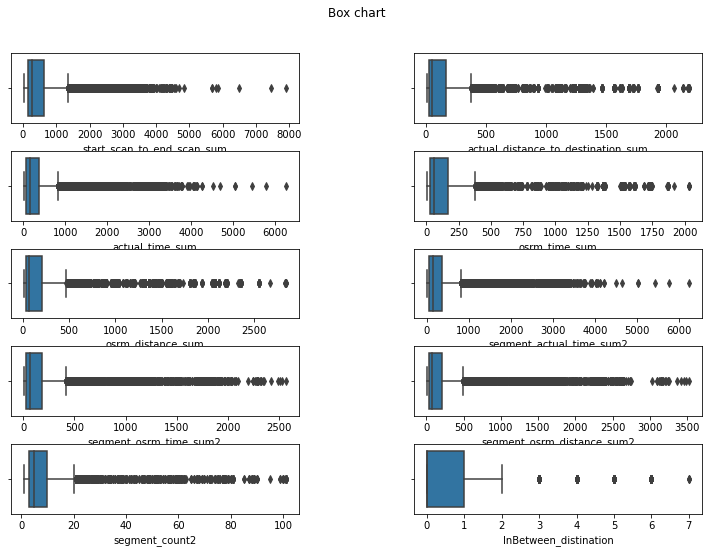

In [33]:
fig, axes = plt.subplots(5, 2,  figsize=(12, 8))
 
fig.suptitle('Box chart')
 
sns.boxplot(ax=axes[0,0], data=df, x= df["start_scan_to_end_scan_sum"])
sns.boxplot(ax=axes[0,1], data=df, x= df["actual_distance_to_destination_sum"])

sns.boxplot(ax=axes[1,0], data=df, x= df["actual_time_sum"])
sns.boxplot(ax=axes[1,1], data=df, x= df["osrm_time_sum"])

sns.boxplot(ax=axes[2,0], data=df, x= df["osrm_distance_sum"])
sns.boxplot(ax=axes[2,1], data=df, x= df["segment_actual_time_sum2"])

sns.boxplot(ax=axes[3,0], data=df, x= df["segment_osrm_time_sum2"])
sns.boxplot(ax=axes[3,1], data=df, x= df["segment_osrm_distance_sum2"])

sns.boxplot(ax=axes[4,0], data=df, x= df["segment_count2"])
sns.boxplot(ax=axes[4,1], data=df, x= df["InBetween_distination"])


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

**Observation - 2:**

1. Oulier present in -->

    Column with Outlier -->  start_scan_to_end_scan_sum
    Upper and lower limit --> 1356.5  and  -575.5
    Number of records as outlier -->  1282

    Column with Outlier -->  actual_distance_to_destination_sum
    Upper and lower limit --> 374.8  and  -188.4
    Number of records as outlier -->  1453

    Column with Outlier -->  actual_time_sum
    Upper and lower limit --> 817.0  and  -383.0
    Number of records as outlier -->  1646

    Column with Outlier -->  osrm_time_sum
    Upper and lower limit --> 376.5  and  -179.5
    Number of records as outlier -->  1506

    Column with Outlier -->  osrm_distance_sum
    Upper and lower limit --> 470.5  and  -233.1
    Number of records as outlier -->  1522

    Column with Outlier -->  segment_actual_time_sum2
    Upper and lower limit --> 811.0  and  -381.0
    Number of records as outlier -->  1644

    Column with Outlier -->  segment_osrm_time_sum2
    Upper and lower limit --> 415.0  and  -201.0
    Number of records as outlier -->  1485

    Column with Outlier -->  segment_osrm_distance_sum2
    Upper and lower limit --> 492.5  and  -243.4
    Number of records as outlier -->  1550

    Column with Outlier -->  segment_count2
    Upper and lower limit --> 20.5  and  -7.5
    Number of records as outlier -->  1485

    Column with Outlier -->  InBetween_distination
    Upper and lower limit --> 2.5  and  -1.5
    Number of records as outlier -->  1648
    
    
2. Need to remove/replace with by IQR method before any other process.

# 3 Visual Analysis - Univariate & Bivariate 

In [34]:
df.head(2)

,trip_creation_time,route_type,trip_uuid,source_center_first,source_name_first,destination_center_last,destination_name_last,od_start_time_first,od_end_time_last,start_scan_to_end_scan_sum,actual_distance_to_destination_sum,actual_time_sum,osrm_time_sum,osrm_distance_sum,segment_actual_time_sum2,segment_osrm_time_sum2,segment_osrm_distance_sum2,segment_count2,InBetween_distination
0,2018-09-27 00:02:18.970980,Carting,trip-153800653897073708,IND424006AAA,Dhule_MIDCAvdn_I (Maharashtra),IND424101AAA,Chalisgaon_BhadgDPP_D (Maharashtra),2018-09-27 00:02:18.970980,2018-09-27 02:28:08.036773,145.0,49.557160,128.0,40.0,56.8745,126.0,47.0,67.4925,7,0
1,2018-09-27 00:02:29.352390,Carting,trip-153800654935210748,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-27 00:02:29.352390,2018-09-27 01:23:35.904326,81.0,17.774611,58.0,17.0,21.7310,58.0,17.0,21.7310,2,0


### route type analysis

In [35]:
df['route_type'].value_counts()

Carting    8906
FTL        5881
Name: route_type, dtype: int64

In [36]:
Grouped_by_in_route_type = df.groupby('route_type', 
                        as_index=False).agg(mean_actual_time=('actual_time_sum', 'mean'),
                                           mean_actual_distance=('actual_distance_to_destination_sum', 'mean'))

Grouped_by_in_route_type.sort_values(['mean_actual_time','mean_actual_distance'],  ascending=[False, False]).round(1)

,route_type,mean_actual_time,mean_actual_distance
1,FTL,705.4,351.6
0,Carting,125.8,40.3


<AxesSubplot:xlabel='actual_time_sum', ylabel='actual_distance_to_destination_sum'>

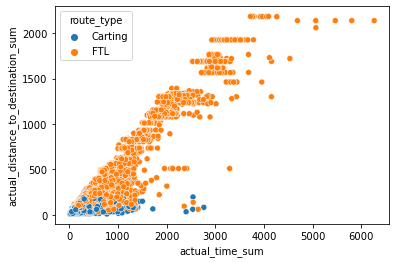

In [37]:
sns.scatterplot(data=df, x=df["actual_time_sum"], y=df["actual_distance_to_destination_sum"], hue=df["route_type"])

### In Between_distination analysis

In [38]:
df['InBetween_distination'].value_counts()

0    8971
1    2700
2    1468
3    1021
4     462
5     104
6      58
7       3
Name: InBetween_distination, dtype: int64

In [39]:
Grouped_by_in_between_destination = df.groupby('InBetween_distination', 
                        as_index=False).agg(mean_actual_time=('actual_time_sum', 'mean'),
                                           mean_actual_distance=('actual_distance_to_destination_sum', 'mean'))

Grouped_by_in_between_destination.sort_values(['mean_actual_time','mean_actual_distance'],  ascending=[False, False]).round(1)

,InBetween_distination,mean_actual_time,mean_actual_distance
7,7,1018.0,461.3
5,5,605.1,272.8
6,6,604.3,300.3
3,3,565.5,242.6
1,1,542.4,261.4
4,4,536.7,223.4
2,2,489.8,216.7
0,0,240.7,112.0


<AxesSubplot:xlabel='actual_time_sum', ylabel='actual_distance_to_destination_sum'>

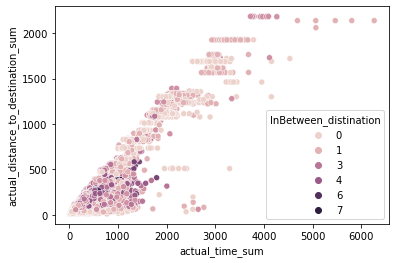

In [40]:
sns.scatterplot(data=df, x=df["actual_time_sum"], y=df["actual_distance_to_destination_sum"], hue=df["InBetween_distination"])

<AxesSubplot:xlabel='actual_time_sum', ylabel='actual_distance_to_destination_sum'>

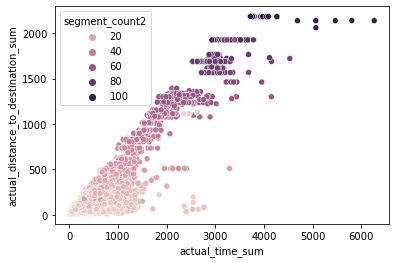

In [41]:
sns.scatterplot(data=df, x=df["actual_time_sum"], y=df["actual_distance_to_destination_sum"], hue=df["segment_count2"])

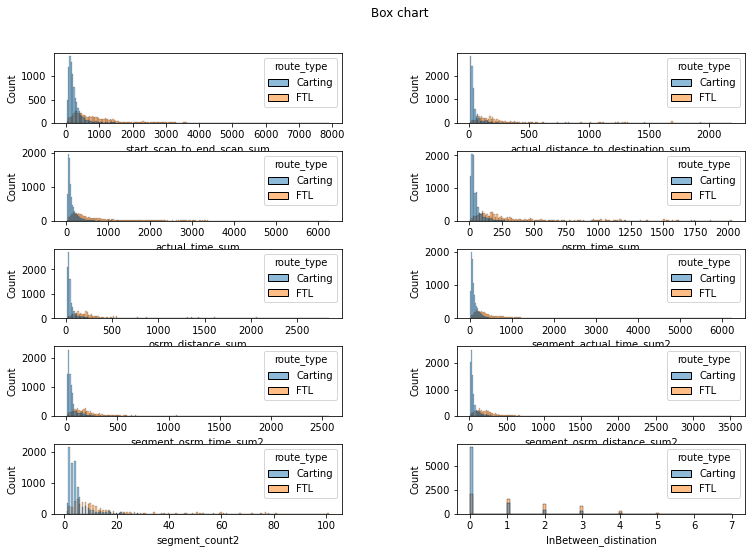

In [42]:
fig, axes = plt.subplots(5, 2,  figsize=(12, 8))
 
fig.suptitle('Box chart')
 
sns.histplot(ax=axes[0,0], data=df, x= df["start_scan_to_end_scan_sum"],hue = 'route_type')
sns.histplot(ax=axes[0,1], data=df, x= df["actual_distance_to_destination_sum"],hue = 'route_type')

sns.histplot(ax=axes[1,0], data=df, x= df["actual_time_sum"],hue = 'route_type')
sns.histplot(ax=axes[1,1], data=df, x= df["osrm_time_sum"],hue = 'route_type')

sns.histplot(ax=axes[2,0], data=df, x= df["osrm_distance_sum"],hue = 'route_type')
sns.histplot(ax=axes[2,1], data=df, x= df["segment_actual_time_sum2"],hue = 'route_type')

sns.histplot(ax=axes[3,0], data=df, x= df["segment_osrm_time_sum2"],hue = 'route_type')
sns.histplot(ax=axes[3,1], data=df, x= df["segment_osrm_distance_sum2"],hue = 'route_type')

sns.histplot(ax=axes[4,0], data=df, x= df["segment_count2"],hue = 'route_type')
sns.histplot(ax=axes[4,1], data=df, x= df["InBetween_distination"],hue = 'route_type')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

<AxesSubplot:>

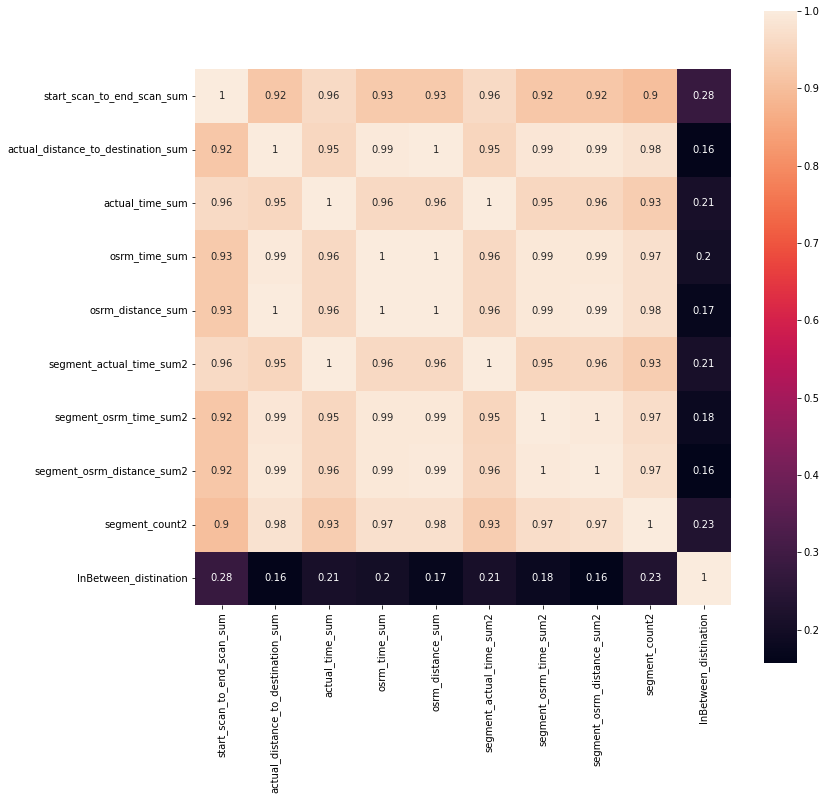

In [43]:
# Correlation
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(method='pearson'), square=True,annot=True)

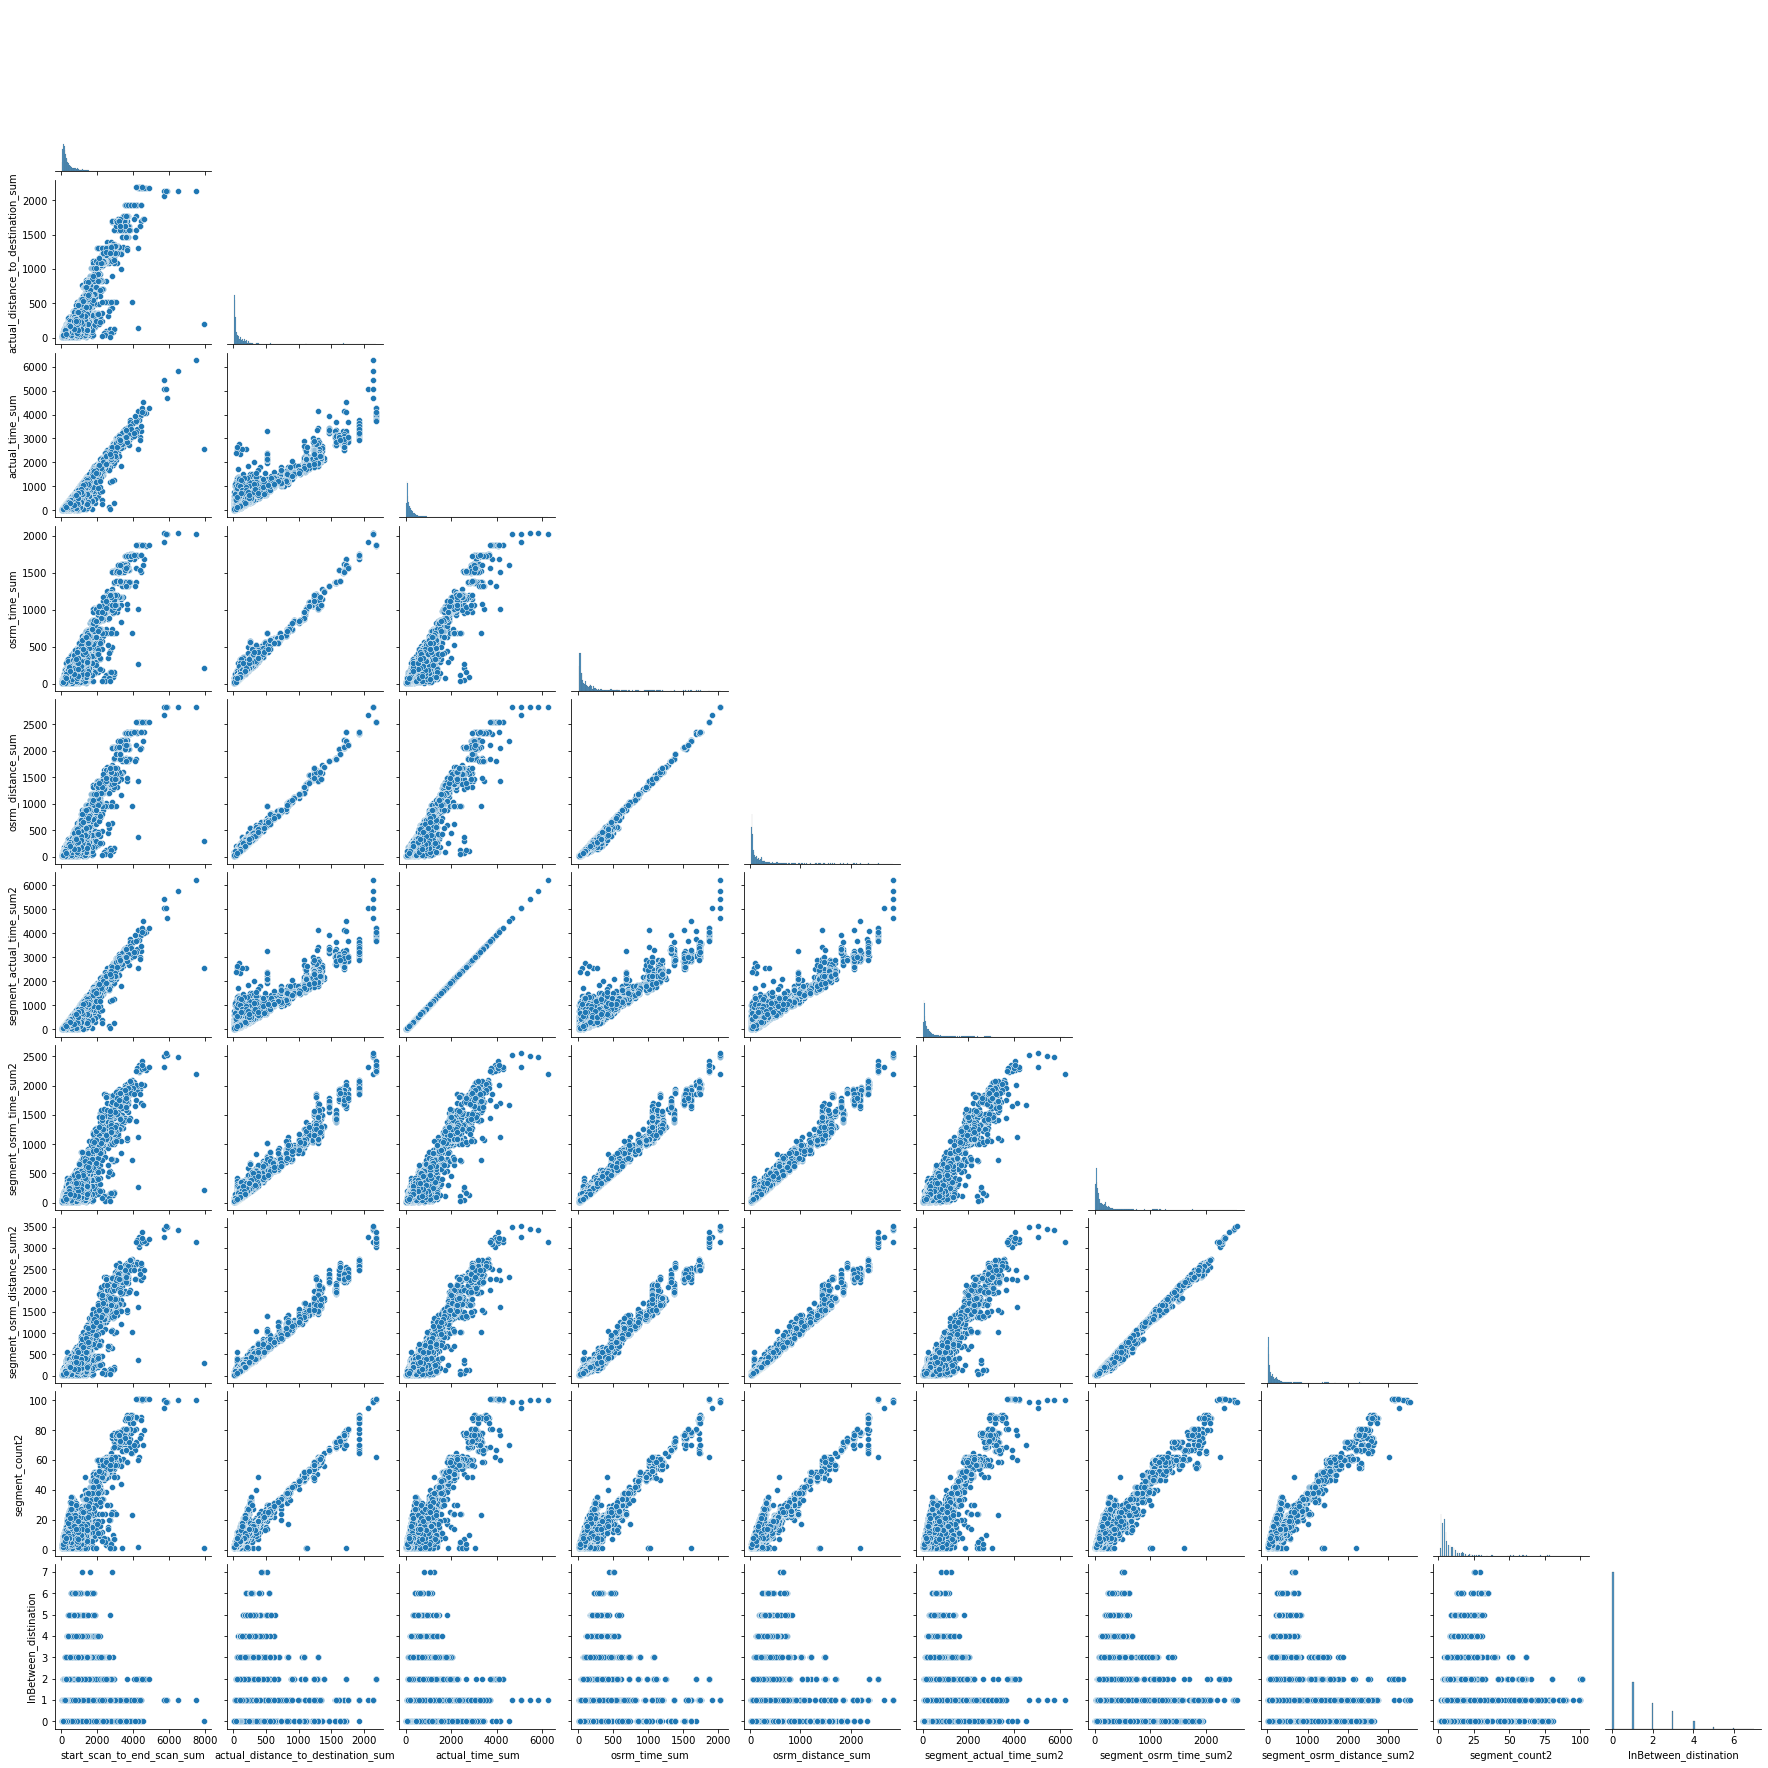

In [44]:
sns.pairplot(data=df, corner=True)

**Observation - 3:**

1. Type of route and count of data points
    1. Carting  - 8906
    2. FTL      -  5881

2. Calculate in between stops between source and destination - 
  Stops    Counts
    0      8971
    1      2700
    2      1468
    3      1021
    4       462
    5       104
    6        58
    7         3

3. Relation of time and distance with respect to route type.
    FTL takes more time and distance compared to Carting.

4. Relation of time and distance with respect to - in-between destination.
    Higher the number of in between distinations, greater the time and distance.
    
5. Relation of time and distance with respect to in segment count between source and destination.
    Higer the number of segments, greater the time and distance.

# 4. Feature Creation

In [45]:
df.head(2)#['source_name_first']

,trip_creation_time,route_type,trip_uuid,source_center_first,source_name_first,destination_center_last,destination_name_last,od_start_time_first,od_end_time_last,start_scan_to_end_scan_sum,actual_distance_to_destination_sum,actual_time_sum,osrm_time_sum,osrm_distance_sum,segment_actual_time_sum2,segment_osrm_time_sum2,segment_osrm_distance_sum2,segment_count2,InBetween_distination
0,2018-09-27 00:02:18.970980,Carting,trip-153800653897073708,IND424006AAA,Dhule_MIDCAvdn_I (Maharashtra),IND424101AAA,Chalisgaon_BhadgDPP_D (Maharashtra),2018-09-27 00:02:18.970980,2018-09-27 02:28:08.036773,145.0,49.557160,128.0,40.0,56.8745,126.0,47.0,67.4925,7,0
1,2018-09-27 00:02:29.352390,Carting,trip-153800654935210748,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-27 00:02:29.352390,2018-09-27 01:23:35.904326,81.0,17.774611,58.0,17.0,21.7310,58.0,17.0,21.7310,2,0


In [46]:
df['Source_State'] = df['source_name_first'].str.split('(').str[1]
df['Source_State'] = df['Source_State'].str.split(')').str[0]
df['Source_City'] = df['source_name_first'].str.split('(').str[0]

df['Destination_State'] = df['destination_name_last'].str.split('(').str[1]
df['Destination_State'] = df['Destination_State'].str.split(')').str[0]
df['Destination_City'] = df['destination_name_last'].str.split('(').str[0]

df.head(2)

,trip_creation_time,route_type,trip_uuid,source_center_first,source_name_first,destination_center_last,destination_name_last,od_start_time_first,od_end_time_last,start_scan_to_end_scan_sum,...,osrm_distance_sum,segment_actual_time_sum2,segment_osrm_time_sum2,segment_osrm_distance_sum2,segment_count2,InBetween_distination,Source_State,Source_City,Destination_State,Destination_City
0,2018-09-27 00:02:18.970980,Carting,trip-153800653897073708,IND424006AAA,Dhule_MIDCAvdn_I (Maharashtra),IND424101AAA,Chalisgaon_BhadgDPP_D (Maharashtra),2018-09-27 00:02:18.970980,2018-09-27 02:28:08.036773,145.0,...,56.8745,126.0,47.0,67.4925,7,0,Maharashtra,Dhule_MIDCAvdn_I,Maharashtra,Chalisgaon_BhadgDPP_D
1,2018-09-27 00:02:29.352390,Carting,trip-153800654935210748,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-27 00:02:29.352390,2018-09-27 01:23:35.904326,81.0,...,21.7310,58.0,17.0,21.7310,2,0,Maharashtra,Mumbai Hub,Maharashtra,Mumbai_MiraRd_IP


In [47]:
df['Source_State'].value_counts()

Maharashtra               2714
Karnataka                 2143
Haryana                   1823
Tamil Nadu                1039
Telangana                  784
Uttar Pradesh              760
Gujarat                    750
Delhi                      725
West Bengal                665
Punjab                     536
Rajasthan                  514
Andhra Pradesh             435
Bihar                      351
Madhya Pradesh             318
Kerala                     289
Assam                      268
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Chandigarh                  93
Goa                         65
Chhattisgarh                43
Himachal Pradesh            34
Jammu & Kashmir             17
Dadra and Nagar Haveli      15
Pondicherry                 12
Nagaland                     5
Arunachal Pradesh            4
Mizoram                      4
Name: Source_State, dtype: int64

In [48]:
df['Destination_State'].value_counts()

Maharashtra               2561
Karnataka                 2294
Haryana                   1640
Tamil Nadu                1084
Uttar Pradesh              805
Telangana                  784
Gujarat                    734
West Bengal                697
Delhi                      657
Punjab                     617
Rajasthan                  550
Andhra Pradesh             442
Bihar                      367
Madhya Pradesh             350
Kerala                     270
Assam                      232
Jharkhand                  181
Uttarakhand                122
Orissa                     119
Chandigarh                  65
Goa                         52
Chhattisgarh                43
Himachal Pradesh            42
Arunachal Pradesh           25
Jammu & Kashmir             20
Dadra and Nagar Haveli      17
Meghalaya                    8
Mizoram                      6
Daman & Diu                  1
Nagaland                     1
Tripura                      1
Name: Destination_State, dtype: int64

In [49]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['Day'] = df['trip_creation_time'].apply(lambda x: x.day)

df['Year'], df['Month'] = df['trip_creation_time'].apply(lambda x: x.year), df['trip_creation_time'].apply(lambda x: x.month)

df.head(2)

,trip_creation_time,route_type,trip_uuid,source_center_first,source_name_first,destination_center_last,destination_name_last,od_start_time_first,od_end_time_last,start_scan_to_end_scan_sum,...,segment_osrm_distance_sum2,segment_count2,InBetween_distination,Source_State,Source_City,Destination_State,Destination_City,Day,Year,Month
0,2018-09-27 00:02:18.970980,Carting,trip-153800653897073708,IND424006AAA,Dhule_MIDCAvdn_I (Maharashtra),IND424101AAA,Chalisgaon_BhadgDPP_D (Maharashtra),2018-09-27 00:02:18.970980,2018-09-27 02:28:08.036773,145.0,...,67.4925,7,0,Maharashtra,Dhule_MIDCAvdn_I,Maharashtra,Chalisgaon_BhadgDPP_D,27,2018,9
1,2018-09-27 00:02:29.352390,Carting,trip-153800654935210748,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-27 00:02:29.352390,2018-09-27 01:23:35.904326,81.0,...,21.7310,2,0,Maharashtra,Mumbai Hub,Maharashtra,Mumbai_MiraRd_IP,27,2018,9


In [50]:
df["Month"].value_counts()

9     13011
10     1776
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='count'>

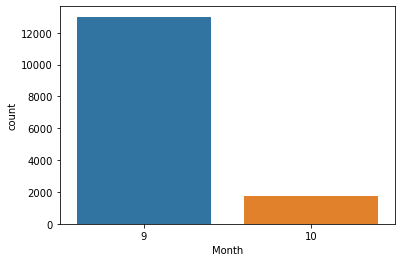

In [51]:
sns.countplot(data=df, x=df["Month"])

<AxesSubplot:xlabel='Day', ylabel='count'>

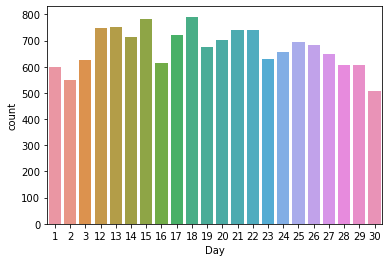

In [52]:
sns.countplot(data=df, x=df["Day"])

# Hypotesis testing 

# Hypotesis testing - 1
**Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.**

As per my understanding, it's od_time_diff (time taken between od_start_time and od_end_time), the one they asked in the above point:
Calculate the time taken between od_start_time and od_end_time and keep it as a feature

In [53]:
df.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center_first',
       'source_name_first', 'destination_center_last', 'destination_name_last',
       'od_start_time_first', 'od_end_time_last', 'start_scan_to_end_scan_sum',
       'actual_distance_to_destination_sum', 'actual_time_sum',
       'osrm_time_sum', 'osrm_distance_sum', 'segment_actual_time_sum2',
       'segment_osrm_time_sum2', 'segment_osrm_distance_sum2',
       'segment_count2', 'InBetween_distination', 'Source_State',
       'Source_City', 'Destination_State', 'Destination_City', 'Day', 'Year',
       'Month'],
      dtype='object')

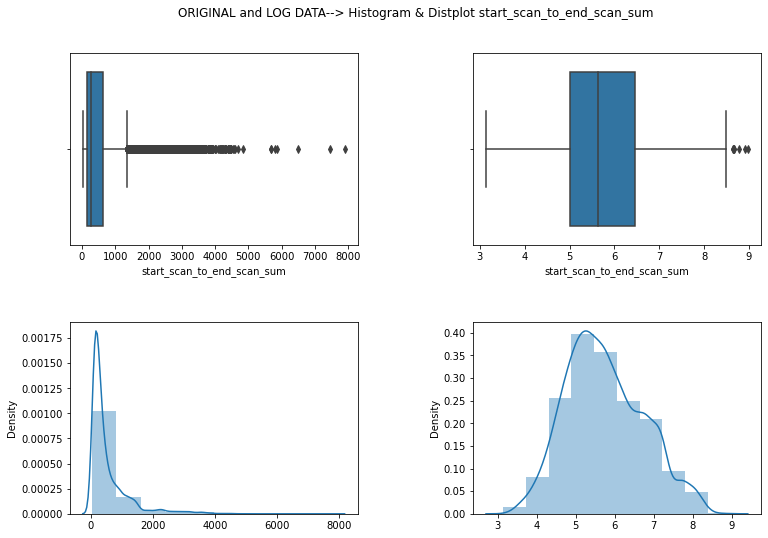

In [54]:
################################################# Part-1 ######################################
fig, axes = plt.subplots(2, 2,  figsize=(12, 8))
 
fig.suptitle('ORIGINAL and LOG DATA--> Histogram & Distplot start_scan_to_end_scan_sum')
 
sns.boxplot(ax=axes[0,0], data=df, x=df["start_scan_to_end_scan_sum"])
sns.boxplot(ax=axes[0,1], data=df, x=np.log(df["start_scan_to_end_scan_sum"]))

##fig.suptitle('LOG DATA--> Histogram & Distplot start_scan_to_end_scan_sum')
sns.distplot(ax=axes[1,0], bins=10, x = df['start_scan_to_end_scan_sum'])
sns.distplot(ax=axes[1,1], x = np.log(df['start_scan_to_end_scan_sum']), bins=10)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [55]:
dfn = df.copy()

# Outlier Treatment using IQR -
q1 = dfn['start_scan_to_end_scan_sum'].quantile(0.25)
q3 = dfn['start_scan_to_end_scan_sum'].quantile(0.75)
iqr = q3-q1

dfn = dfn[(dfn['start_scan_to_end_scan_sum']>(q1-1.5*iqr) ) & (dfn['start_scan_to_end_scan_sum']<(q3+1.5*iqr))]
print("No. of rows after outlier removed - start_scan_to_end_scan_sum : ", dfn.shape[0])

No. of rows after outlier removed - start_scan_to_end_scan_sum :  13505


**Step 1: Define the null and alternate hypothesis**

H0: start_scan_to_end_scan_sum follows normal distribustion.

H1: start_scan_to_end_scan_sum not follows normal distribustion.

**Step 2: Select an appropriate test**

Shapiro-Wilk’s test -

In [56]:
print(shapiro(dfn['actual_time_sum'].sample(4999)))

ShapiroResult(statistic=0.7779930233955383, pvalue=0.0)


**Observation: Since the p-value is less than the 5% significance level, we reject the null
hypothesis.** 

**Variable doesn't follow normal distribution.**

# Hypotesis testing - 2
**Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

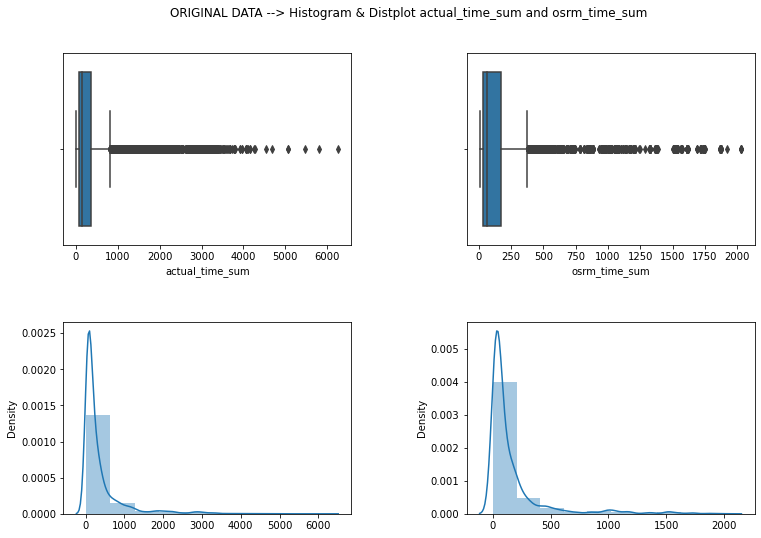

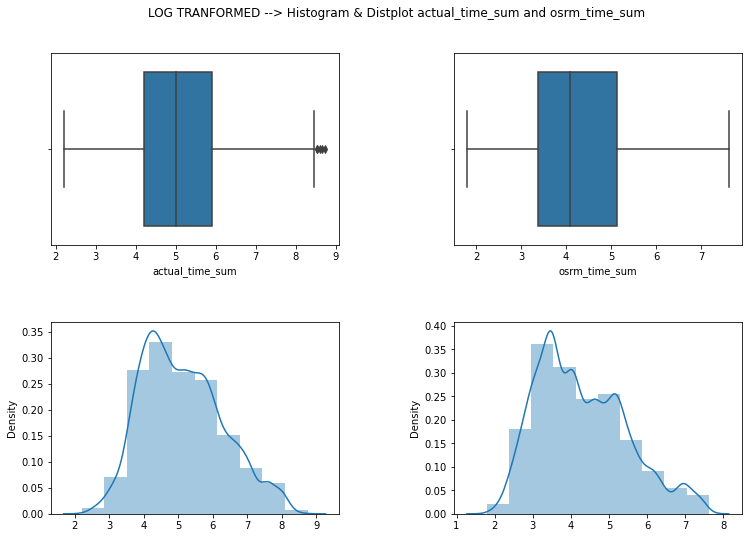

In [57]:
################################################# Part-1 ######################################
fig, axes = plt.subplots(2, 2,  figsize=(12, 8))
 
fig.suptitle('ORIGINAL DATA --> Histogram & Distplot actual_time_sum and osrm_time_sum')
 
sns.boxplot(ax=axes[0,0], data=df, x=df["actual_time_sum"])
sns.boxplot(ax=axes[0,1], data=df, x=df["osrm_time_sum"])


sns.distplot(ax=axes[1,0], bins=10, x = df['actual_time_sum'])
sns.distplot(ax=axes[1,1], x = df['osrm_time_sum'], bins=10)



# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

################################################# Part-2 ######################################

fig, axes = plt.subplots(2, 2,  figsize=(12, 8))
 
fig.suptitle('LOG TRANFORMED --> Histogram & Distplot actual_time_sum and osrm_time_sum')
 
sns.boxplot(ax=axes[0,0], data=df, x=np.log(df['actual_time_sum']))
sns.boxplot(ax=axes[0,1], data=df, x=np.log(df['osrm_time_sum']))
#sns.distplot(np.log(df['actual_time_sum']), bins=10)
sns.distplot(ax=axes[1,0], x = np.log(df['actual_time_sum']), bins=10)
sns.distplot(ax=axes[1,1], x = np.log(df['osrm_time_sum']), bins=10)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [58]:
dfn = df.copy()

# Outlier Treatment using IQR -
q1 = dfn['actual_time_sum'].quantile(0.25)
q3 = dfn['actual_time_sum'].quantile(0.75)
iqr = q3-q1

dfn = dfn[(dfn['actual_time_sum']>(q1-1.5*iqr) ) & (dfn['actual_time_sum']<(q3+1.5*iqr))]
print("No. of rows after outlier removed - actual_time_sum : ", dfn.shape[0])


# Outlier Treatment using IQR -
q1 = dfn['osrm_time_sum'].quantile(0.25)
q3 = dfn['osrm_time_sum'].quantile(0.75)
iqr = q3-q1

dfn = dfn[(dfn['osrm_time_sum']>(q1-1.5*iqr) ) & (dfn['osrm_time_sum']<(q3+1.5*iqr))]
print("No. of rows after outlier removed - osrm_time_sum : ", dfn.shape[0])

No. of rows after outlier removed - actual_time_sum :  13139
No. of rows after outlier removed - osrm_time_sum :  12357


In [59]:
# df['actual_time_sum'][10]
# df['osrm_time_sum'][10]

**Step 1: Define the null and alternate hypothesis**

H0: There is no difference between actual_time_sum and osrm_time_sum.

H1: There is difference between actual_time_sum and osrm_time_sum.

**Step 2: Select an appropriate test**

Two sample dependent test - 
because we are chechking value before and after for same value.

In [60]:
sample1 = dfn['actual_time_sum'].sample(1500)
sample2 = dfn['osrm_time_sum'].sample(1500)

In [61]:
dfn[['actual_time_sum','osrm_time_sum']].describe()

,actual_time_sum,osrm_time_sum
count,12357.000000,12357.000000
mean,165.928623,71.306547
std,144.808173,61.164075
min,9.000000,6.000000
25%,60.000000,26.000000
50%,110.000000,48.000000
75%,234.000000,100.000000
max,810.000000,256.000000


Shapiro-Wilk’s test -

H0: Variables follows normal distribution.

H1: Variables doesn't follow normal distribution.

In [62]:
print(shapiro(dfn['actual_time_sum'].sample(4999)))
print(shapiro(dfn['osrm_time_sum'].sample(4999)))

ShapiroResult(statistic=0.838043212890625, pvalue=0.0)
ShapiroResult(statistic=0.831602931022644, pvalue=0.0)


**Observation: Since the p-value is less than the 5% significance level, we reject the null
hypothesis.** 

**Variables doesn't follow normal distribution.**

**Means - We can't use parametric test here** 

**Do --> non parametric test --> wilcoxon test --> equivalent of paired t-test**

**Step 3: Decide the significance level**

**Step 4: Calculate the p-value**

In [63]:
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(sample1, sample2)

WilcoxonResult(statistic=193676.5, pvalue=1.9627421203666454e-106)

**As the p-value less than the level of significance, we reject the null**

**There is significant difference between actual_time_sum and osrm_time_sum.**

In [64]:
## below codes are for understanding other ways of hypotesis
## just for learning

In [65]:
# H0: mean1 >= mean2
# H1: mean1 < mean2
    
ttest_rel(sample1, sample2, alternative='less')

# P-value greater than alpha--> Fail to reject the null hypotesis.

Ttest_relResult(statistic=24.573903146442007, pvalue=1.0)

In [66]:
# H0: mean1 <= mean2
# H1: mean1 > mean2

ttest_rel(sample1, sample2, alternative="greater")

# P-value less than alpha--> Reject the null hypotesis.

Ttest_relResult(statistic=24.573903146442007, pvalue=1.2517736524844047e-112)

In [67]:
# H0: mean1 = mean2
# H1: mean1 != mean2

ttest_rel(sample1, sample2, alternative="two-sided")

# P-value less than alpha--> Reject the null hypotesis.

Ttest_relResult(statistic=24.573903146442007, pvalue=2.5035473049688093e-112)

# Hypotesis testing - 3
**Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [68]:
df.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center_first',
       'source_name_first', 'destination_center_last', 'destination_name_last',
       'od_start_time_first', 'od_end_time_last', 'start_scan_to_end_scan_sum',
       'actual_distance_to_destination_sum', 'actual_time_sum',
       'osrm_time_sum', 'osrm_distance_sum', 'segment_actual_time_sum2',
       'segment_osrm_time_sum2', 'segment_osrm_distance_sum2',
       'segment_count2', 'InBetween_distination', 'Source_State',
       'Source_City', 'Destination_State', 'Destination_City', 'Day', 'Year',
       'Month'],
      dtype='object')

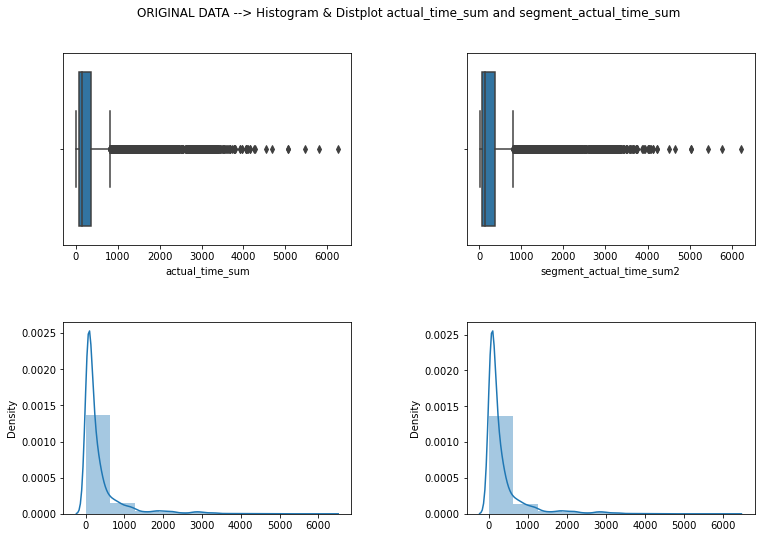

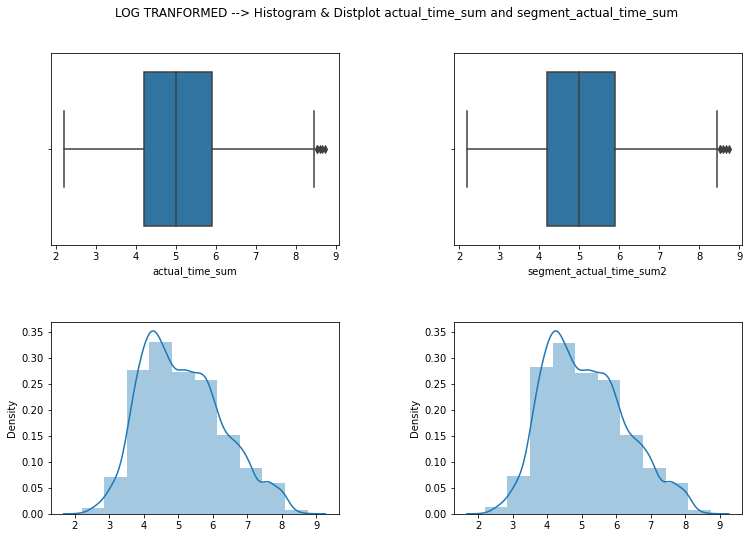

In [69]:
################################################# Part-1 ######################################
fig, axes = plt.subplots(2, 2,  figsize=(12, 8))
 
fig.suptitle('ORIGINAL DATA --> Histogram & Distplot actual_time_sum and segment_actual_time_sum')
 
sns.boxplot(ax=axes[0,0], data=df, x=df["actual_time_sum"])
sns.boxplot(ax=axes[0,1], data=df, x=df["segment_actual_time_sum2"])


sns.distplot(ax=axes[1,0], bins=10, x = df['actual_time_sum'])
sns.distplot(ax=axes[1,1], x = df['segment_actual_time_sum2'], bins=10)



# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

################################################# Part-2 ######################################

fig, axes = plt.subplots(2, 2,  figsize=(12, 8))
 
fig.suptitle('LOG TRANFORMED --> Histogram & Distplot actual_time_sum and segment_actual_time_sum')
 
sns.boxplot(ax=axes[0,0], data=df, x=np.log(df['actual_time_sum']))
sns.boxplot(ax=axes[0,1], data=df, x=np.log(df['segment_actual_time_sum2']))
#sns.distplot(np.log(df['actual_time_sum']), bins=10)
sns.distplot(ax=axes[1,0], x = np.log(df['actual_time_sum']), bins=10)
sns.distplot(ax=axes[1,1], x = np.log(df['segment_actual_time_sum2']), bins=10)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [70]:
dfn = df.copy()

# Outlier Treatment using IQR -
q1 = dfn['actual_time_sum'].quantile(0.25)
q3 = dfn['actual_time_sum'].quantile(0.75)
iqr = q3-q1

dfn = dfn[(dfn['actual_time_sum']>(q1-1.5*iqr) ) & (dfn['actual_time_sum']<(q3+1.5*iqr))]
print("No. of rows after outlier removed - actual_time_sum : ", dfn.shape[0])


# Outlier Treatment using IQR -
q1 = dfn['segment_actual_time_sum2'].quantile(0.25)
q3 = dfn['segment_actual_time_sum2'].quantile(0.75)
iqr = q3-q1

dfn = dfn[(dfn['segment_actual_time_sum2']>(q1-1.5*iqr) ) & (dfn['segment_actual_time_sum2']<(q3+1.5*iqr))]
print("No. of rows after outlier removed - segment_actual_time_sum2 : ", dfn.shape[0])

No. of rows after outlier removed - actual_time_sum :  13139
No. of rows after outlier removed - segment_actual_time_sum2 :  12415


**Step 1: Define the null and alternate hypothesis**

H0: There is no difference between actual_time_sum and segment_actual_time_sum2.

H1: There is difference between actual_time_sum and segment_actual_time_sum2.

**Step 2: Select an appropriate test**

Two sample dependent test - 
because we are chechking value before and after for same value.

In [71]:
sample1 = dfn['actual_time_sum'].sample(1500)
sample2 = dfn['segment_actual_time_sum2'].sample(1500)

In [72]:
dfn[['actual_time_sum','segment_actual_time_sum2']].describe()

,actual_time_sum,segment_actual_time_sum2
count,12415.000000,12415.000000
mean,163.498671,161.891261
std,134.898042,133.837745
min,9.000000,9.000000
25%,60.000000,59.000000
50%,110.000000,109.000000
75%,236.000000,235.000000
max,586.000000,578.000000


**Shapiro-Wilk’s test -**

H0: Variables follows normal distribution.

H1: Variables doesn't follow normal distribution.

In [73]:
print(shapiro(dfn['actual_time_sum'].sample(4999)))
print(shapiro(dfn['segment_actual_time_sum2'].sample(4999)))

ShapiroResult(statistic=0.8579065203666687, pvalue=0.0)
ShapiroResult(statistic=0.8572180271148682, pvalue=0.0)


**Observation: Since the p-value is less than the 5% significance level, we reject the null
hypothesis.** 

**Variables doesn't follow normal distribution.**

**Means - We can't use parametric test here** 

**Do --> non parametric test --> wilcoxon test --> equivalent of paired t-test**

**Step 3: Decide the significance level**

As given in the problem statement, we select α = 0.05.

**Step 4: Calculate the p-value**

In [74]:
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(sample1, sample2)

WilcoxonResult(statistic=544597.5, pvalue=0.36053090610054284)

**As the p-value greater than the level of significance, Fail to reject the null**

**There is no significant difference between actual_time_sum and segment_actual_time_sum2.**

In [75]:
# H0: mean1 = mean2
# H1: mean1 != mean2

ttest_rel(sample1, sample2, alternative="two-sided")

# P-value less than alpha--> Fail to reject the null hypotesis.

Ttest_relResult(statistic=-0.9586295645764644, pvalue=0.33789998109627783)

# Hypotesis testing - 4
**Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [76]:
df.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center_first',
       'source_name_first', 'destination_center_last', 'destination_name_last',
       'od_start_time_first', 'od_end_time_last', 'start_scan_to_end_scan_sum',
       'actual_distance_to_destination_sum', 'actual_time_sum',
       'osrm_time_sum', 'osrm_distance_sum', 'segment_actual_time_sum2',
       'segment_osrm_time_sum2', 'segment_osrm_distance_sum2',
       'segment_count2', 'InBetween_distination', 'Source_State',
       'Source_City', 'Destination_State', 'Destination_City', 'Day', 'Year',
       'Month'],
      dtype='object')

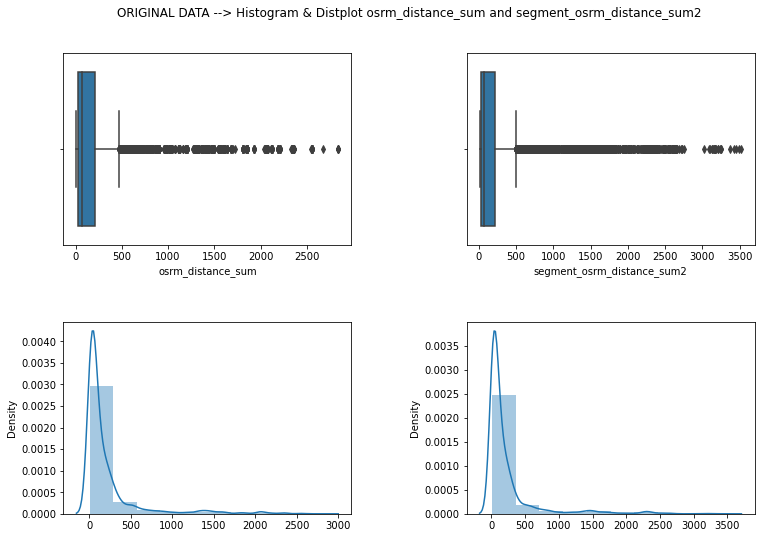

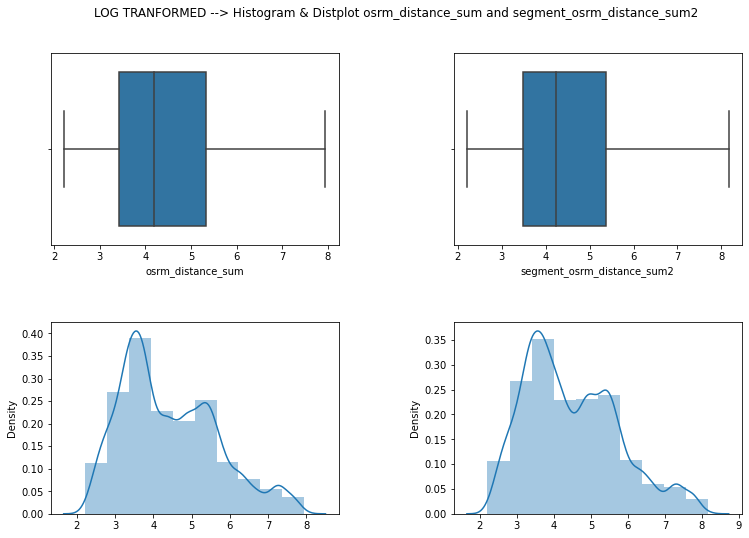

In [77]:
################################################# Part-1 ######################################
fig, axes = plt.subplots(2, 2,  figsize=(12, 8))
 
fig.suptitle('ORIGINAL DATA --> Histogram & Distplot osrm_distance_sum and segment_osrm_distance_sum2')
 
sns.boxplot(ax=axes[0,0], data=df, x=df["osrm_distance_sum"])
sns.boxplot(ax=axes[0,1], data=df, x=df["segment_osrm_distance_sum2"])


sns.distplot(ax=axes[1,0], bins=10, x = df['osrm_distance_sum'])
sns.distplot(ax=axes[1,1], x = df['segment_osrm_distance_sum2'], bins=10)



# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

################################################# Part-2 ######################################

fig, axes = plt.subplots(2, 2,  figsize=(12, 8))
 
fig.suptitle('LOG TRANFORMED --> Histogram & Distplot osrm_distance_sum and segment_osrm_distance_sum2')
 
sns.boxplot(ax=axes[0,0], data=df, x=np.log(df['osrm_distance_sum']))
sns.boxplot(ax=axes[0,1], data=df, x=np.log(df['segment_osrm_distance_sum2']))

sns.distplot(ax=axes[1,0], x = np.log(df['osrm_distance_sum']), bins=10)
sns.distplot(ax=axes[1,1], x = np.log(df['segment_osrm_distance_sum2']), bins=10)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [78]:
dfn = df.copy()

# Outlier Treatment using IQR -
q1 = dfn['osrm_distance_sum'].quantile(0.25)
q3 = dfn['osrm_distance_sum'].quantile(0.75)
iqr = q3-q1

dfn = dfn[(dfn['osrm_distance_sum']>(q1-1.5*iqr) ) & (dfn['osrm_distance_sum']<(q3+1.5*iqr))]
print("No. of rows after outlier removed - osrm_distance_sum : ", dfn.shape[0])


# Outlier Treatment using IQR -
q1 = dfn['segment_osrm_distance_sum2'].quantile(0.25)
q3 = dfn['segment_osrm_distance_sum2'].quantile(0.75)
iqr = q3-q1

dfn = dfn[(dfn['segment_osrm_distance_sum2']>(q1-1.5*iqr) ) & (dfn['segment_osrm_distance_sum2']<(q3+1.5*iqr))]
print("No. of rows after outlier removed - segment_osrm_distance_sum2 : ", dfn.shape[0])

No. of rows after outlier removed - osrm_distance_sum :  13265
No. of rows after outlier removed - segment_osrm_distance_sum2 :  12645


**Step 1: Define the null and alternate hypothesis**

H0: There is no difference between osrm_distance_sum and segment_osrm_distance_sum2.

H1: There is difference between osrm_distance_sum and segment_osrm_distance_sum2.

**Step 2: Select an appropriate test**

Two sample dependent test - 
because we are chechking value before and after for same value.

In [79]:
sample1 = dfn['osrm_distance_sum'].sample(1500)
sample2 = dfn['segment_osrm_distance_sum2'].sample(1500)

In [80]:
dfn[['osrm_distance_sum','segment_osrm_distance_sum2']].describe()

,osrm_distance_sum,segment_osrm_distance_sum2
count,12645.000000,12645.000000
mean,86.281152,91.540498
std,79.473296,82.795102
min,9.072900,9.072900
25%,28.222400,29.312700
50%,47.585700,53.377400
75%,128.167800,135.611700
max,358.388300,338.354100


**Shapiro-Wilk’s test -**

H0: Variables follows normal distribution.

H1: Variables doesn't follow normal distribution.

In [81]:
print(shapiro(dfn['osrm_distance_sum'].sample(4999)))
print(shapiro(dfn['segment_osrm_distance_sum2'].sample(4999)))

ShapiroResult(statistic=0.8181749582290649, pvalue=0.0)
ShapiroResult(statistic=0.8264756202697754, pvalue=0.0)


**Observation: Since the p-value is less than the 5% significance level, we reject the null
hypothesis.** 

**Variables doesn't follow normal distribution.**

**Means - We can't use parametric test here** 

**Do --> non parametric test --> wilcoxon test --> equivalent of paired t-test**

**Step 3: Decide the significance level**

As given in the problem statement, we select α = 0.05.

**Step 4: Calculate the p-value**

In [82]:
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(sample1, sample2)

WilcoxonResult(statistic=536037.0, pvalue=0.10970746216807468)

**As the p-value less than the level of significance, we reject the null**

**There is no significant difference between osrm_distance_sum and segment_osrm_distance_sum2.**

In [83]:
# H0: mean1 = mean2
# H1: mean1 != mean2

ttest_rel(sample1, sample2, alternative="two-sided")

# P-value greater than alpha--> Rail to reject the null hypotesis.

Ttest_relResult(statistic=-1.150471024962155, pvalue=0.25013341577180426)

# Hypotesis testing - 5
**Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [84]:
df.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center_first',
       'source_name_first', 'destination_center_last', 'destination_name_last',
       'od_start_time_first', 'od_end_time_last', 'start_scan_to_end_scan_sum',
       'actual_distance_to_destination_sum', 'actual_time_sum',
       'osrm_time_sum', 'osrm_distance_sum', 'segment_actual_time_sum2',
       'segment_osrm_time_sum2', 'segment_osrm_distance_sum2',
       'segment_count2', 'InBetween_distination', 'Source_State',
       'Source_City', 'Destination_State', 'Destination_City', 'Day', 'Year',
       'Month'],
      dtype='object')

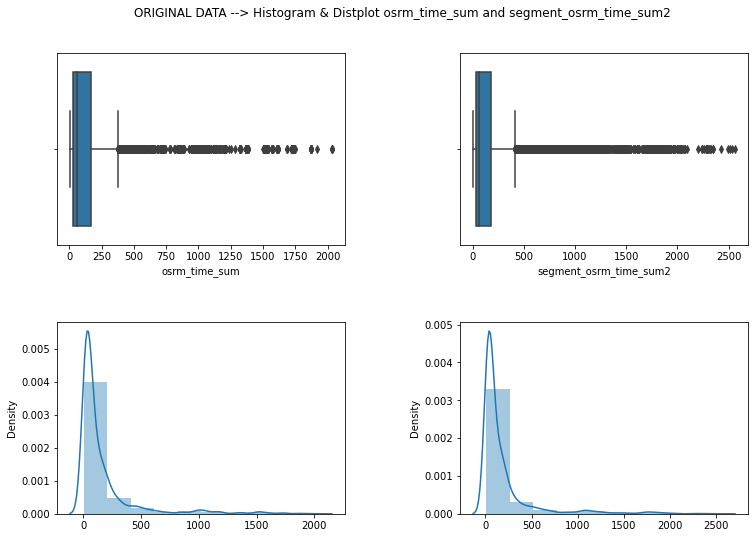

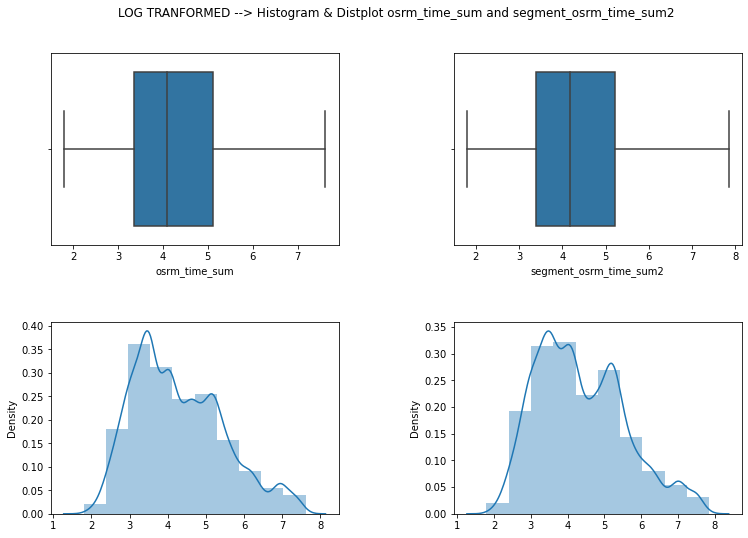

In [85]:
################################################# Part-1 ######################################
fig, axes = plt.subplots(2, 2,  figsize=(12, 8))
 
fig.suptitle('ORIGINAL DATA --> Histogram & Distplot osrm_time_sum and segment_osrm_time_sum2')
 
sns.boxplot(ax=axes[0,0], data=df, x=df["osrm_time_sum"])
sns.boxplot(ax=axes[0,1], data=df, x=df["segment_osrm_time_sum2"])


sns.distplot(ax=axes[1,0], bins=10, x = df['osrm_time_sum'])
sns.distplot(ax=axes[1,1], x = df['segment_osrm_time_sum2'], bins=10)



# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

################################################# Part-2 ######################################

fig, axes = plt.subplots(2, 2,  figsize=(12, 8))
 
fig.suptitle('LOG TRANFORMED --> Histogram & Distplot osrm_time_sum and segment_osrm_time_sum2')
 
sns.boxplot(ax=axes[0,0], data=df, x=np.log(df['osrm_time_sum']))
sns.boxplot(ax=axes[0,1], data=df, x=np.log(df['segment_osrm_time_sum2']))
#sns.distplot(np.log(df['actual_time_sum']), bins=10)
sns.distplot(ax=axes[1,0], x = np.log(df['osrm_time_sum']), bins=10)
sns.distplot(ax=axes[1,1], x = np.log(df['segment_osrm_time_sum2']), bins=10)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [86]:
dfn = df.copy()

# Outlier Treatment using IQR -
q1 = dfn['osrm_time_sum'].quantile(0.25)
q3 = dfn['osrm_time_sum'].quantile(0.75)
iqr = q3-q1

dfn = dfn[(dfn['osrm_time_sum']>(q1-1.5*iqr) ) & (dfn['osrm_time_sum']<(q3+1.5*iqr))]
print("No. of rows after outlier removed - osrm_time_sum : ", dfn.shape[0])


# Outlier Treatment using IQR -
q1 = dfn['segment_osrm_time_sum2'].quantile(0.25)
q3 = dfn['segment_osrm_time_sum2'].quantile(0.75)
iqr = q3-q1

dfn = dfn[(dfn['segment_osrm_time_sum2']>(q1-1.5*iqr) ) & (dfn['segment_osrm_time_sum2']<(q3+1.5*iqr))]
print("No. of rows after outlier removed - segment_osrm_time_sum2 : ", dfn.shape[0])

No. of rows after outlier removed - osrm_time_sum :  13281
No. of rows after outlier removed - segment_osrm_time_sum2 :  12744


**Step 1: Define the null and alternate hypothesis**

H0: There is no difference between osrm_time_sum and segment_osrm_time_sum2.

H1: There is difference between osrm_time_sum and segment_osrm_time_sum2.

**Step 2: Select an appropriate test**

Two sample dependent test - 
because we are chechking value before and after for same value.

In [87]:
sample1 = dfn['osrm_time_sum'].sample(1500)
sample2 = dfn['segment_osrm_time_sum2'].sample(1500)

In [88]:
dfn[['osrm_time_sum','segment_osrm_time_sum2']].describe()

,osrm_time_sum,segment_osrm_time_sum2
count,12744.000000,12744.000000
mean,75.315756,81.969476
std,65.856516,71.289381
min,6.000000,6.000000
25%,27.000000,28.000000
50%,49.000000,53.000000
75%,106.000000,122.000000
max,307.000000,302.000000


**Shapiro-Wilk’s test -**

H0: Variables follows normal distribution.

H1: Variables doesn't follow normal distribution.

In [89]:
print(shapiro(dfn['osrm_time_sum'].sample(4999)))
print(shapiro(dfn['segment_osrm_time_sum2'].sample(4999)))

ShapiroResult(statistic=0.832217812538147, pvalue=0.0)
ShapiroResult(statistic=0.8455410003662109, pvalue=0.0)


**Observation: Since the p-value is less than the 5% significance level, we reject the null
hypothesis.** 

**Variables doesn't follow normal distribution.**

**Means - We can't use parametric test here** 

**Do --> non parametric test --> wilcoxon test --> equivalent of paired t-test**

**Step 3: Decide the significance level**

As given in the problem statement, we select α = 0.05.

**Step 4: Calculate the p-value**

In [90]:
# conduct the Wilcoxon-Signed Rank Test
stats.wilcoxon(sample1, sample2)

WilcoxonResult(statistic=489881.0, pvalue=0.0001567711982016839)

**As the p-value less than the level of significance, Reject the null**

**There is significant difference between osrm_time_sum and segment_osrm_time_sum2.**

In [91]:
# H0: mean1 = mean2
# H1: mean1 != mean2

ttest_rel(sample1, sample2, alternative="two-sided")

# P-value greater than alpha--> Reject the null hypotesis.

Ttest_relResult(statistic=-4.3713418125877315, pvalue=1.3198965268973726e-05)

# Outliers Treatment

Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [92]:
df.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center_first',
       'source_name_first', 'destination_center_last', 'destination_name_last',
       'od_start_time_first', 'od_end_time_last', 'start_scan_to_end_scan_sum',
       'actual_distance_to_destination_sum', 'actual_time_sum',
       'osrm_time_sum', 'osrm_distance_sum', 'segment_actual_time_sum2',
       'segment_osrm_time_sum2', 'segment_osrm_distance_sum2',
       'segment_count2', 'InBetween_distination', 'Source_State',
       'Source_City', 'Destination_State', 'Destination_City', 'Day', 'Year',
       'Month'],
      dtype='object')

In [93]:
def find_outliers(df, i):
    q1 = df[i].quantile(.25)
    q3 = df[i].quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ll = ll.round(1)
    ul = q3 + (1.5*IQR)
    ul = ul.round(1)
    
    upper_outliers = df[df[i] > ul].index.tolist()
    lower_outliers = df[df[i] < ll].index.tolist()
    
    bad_indices = list(set(upper_outliers + lower_outliers))
    if len(bad_indices) > 0:
        print("Column with Outlier --> ", i)
        print("Upper and lower limit -->", ul, " and " ,ll)
        print("Number of records as outlier --> ", len(bad_indices)) 
        print(" ")
        #print(ul, ll)


for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        find_outliers(df, col)

Column with Outlier -->  start_scan_to_end_scan_sum
Upper and lower limit --> 1356.5  and  -575.5
Number of records as outlier -->  1282
 
Column with Outlier -->  actual_distance_to_destination_sum
Upper and lower limit --> 374.8  and  -188.4
Number of records as outlier -->  1453
 
Column with Outlier -->  actual_time_sum
Upper and lower limit --> 817.0  and  -383.0
Number of records as outlier -->  1646
 
Column with Outlier -->  osrm_time_sum
Upper and lower limit --> 376.5  and  -179.5
Number of records as outlier -->  1506
 
Column with Outlier -->  osrm_distance_sum
Upper and lower limit --> 470.5  and  -233.1
Number of records as outlier -->  1522
 
Column with Outlier -->  segment_actual_time_sum2
Upper and lower limit --> 811.0  and  -381.0
Number of records as outlier -->  1644
 
Column with Outlier -->  segment_osrm_time_sum2
Upper and lower limit --> 415.0  and  -201.0
Number of records as outlier -->  1485
 
Column with Outlier -->  segment_osrm_distance_sum2
Upper and lo

In [94]:
#save numeric names
temp = df.copy()

cnames =  ['start_scan_to_end_scan_sum',
       'actual_distance_to_destination_sum', 'actual_time_sum',
       'osrm_time_sum', 'osrm_distance_sum', 'segment_actual_time_sum2',
       'segment_osrm_time_sum2', 'segment_osrm_distance_sum2',
       'segment_count2', 'InBetween_distination']

# Detect and delete outliers from data
for i in cnames:
    #print(i)
    q75, q25 = np.percentile(temp.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    df_no_outlier = temp[temp[i] < maximum]
    df_no_outlier = temp[temp[i] > minimum]
    
df_no_outlier.head(2)

,trip_creation_time,route_type,trip_uuid,source_center_first,source_name_first,destination_center_last,destination_name_last,od_start_time_first,od_end_time_last,start_scan_to_end_scan_sum,...,segment_osrm_distance_sum2,segment_count2,InBetween_distination,Source_State,Source_City,Destination_State,Destination_City,Day,Year,Month
0,2018-09-27 00:02:18.970980,Carting,trip-153800653897073708,IND424006AAA,Dhule_MIDCAvdn_I (Maharashtra),IND424101AAA,Chalisgaon_BhadgDPP_D (Maharashtra),2018-09-27 00:02:18.970980,2018-09-27 02:28:08.036773,145.0,...,67.4925,7,0,Maharashtra,Dhule_MIDCAvdn_I,Maharashtra,Chalisgaon_BhadgDPP_D,27,2018,9
1,2018-09-27 00:02:29.352390,Carting,trip-153800654935210748,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-27 00:02:29.352390,2018-09-27 01:23:35.904326,81.0,...,21.7310,2,0,Maharashtra,Mumbai Hub,Maharashtra,Mumbai_MiraRd_IP,27,2018,9


In [95]:
df_no_outlier.describe()

,start_scan_to_end_scan_sum,actual_distance_to_destination_sum,actual_time_sum,osrm_time_sum,osrm_distance_sum,segment_actual_time_sum2,segment_osrm_time_sum2,segment_osrm_distance_sum2,segment_count2,InBetween_distination,Day,Year,Month
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.0,14787.000000
mean,529.442754,164.092615,356.316224,160.992832,203.889976,353.059174,180.511598,222.705466,9.759654,0.773382,18.375127,2018.0,9.120105
std,658.286556,305.503332,561.528033,271.459648,370.565744,556.365911,314.679279,416.846279,13.601987,1.195815,7.882198,0.0,0.325096
min,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,1.000000,0.000000,1.000000,2018.0,9.000000
25%,149.000000,22.777099,67.000000,29.000000,30.756900,66.000000,30.000000,32.578850,3.000000,0.000000,14.000000,2018.0,9.000000
50%,279.000000,48.287894,148.000000,60.000000,65.302800,147.000000,65.000000,69.784200,5.000000,0.000000,19.000000,2018.0,9.000000
75%,632.000000,163.591258,367.000000,168.000000,206.644200,364.000000,184.000000,216.560600,10.000000,1.000000,25.000000,2018.0,9.000000
max,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,101.000000,7.000000,30.000000,2018.0,10.000000


# Most orders

**Business Insights (10 Points) - 
Should include patterns observed in the data along with what you can infer from it.**

**Eg:
Check from where most orders are coming from (State, Corridor etc)
Busiest corridor, avg distance between them, avg time taken**

In [99]:
df.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center_first',
       'source_name_first', 'destination_center_last', 'destination_name_last',
       'od_start_time_first', 'od_end_time_last', 'start_scan_to_end_scan_sum',
       'actual_distance_to_destination_sum', 'actual_time_sum',
       'osrm_time_sum', 'osrm_distance_sum', 'segment_actual_time_sum2',
       'segment_osrm_time_sum2', 'segment_osrm_distance_sum2',
       'segment_count2', 'InBetween_distination', 'Source_State',
       'Source_City', 'Destination_State', 'Destination_City', 'Day', 'Year',
       'Month'],
      dtype='object')

In [100]:
most_orders = df.groupby(['Source_City','Destination_City'], 
                    as_index=False).agg(destination_sum=('actual_distance_to_destination_sum', 'sum'),
                        actual_time_sum=('actual_time_sum', 'sum'),
                        count=('Source_City', 'count'),
                        destination_mean=('actual_distance_to_destination_sum', 'mean'),
                        actual_time_mean=('actual_time_sum', 'mean'))
most_orders = most_orders.round(1)
most_orders.sort_values('count', ascending=False)

,Source_City,Destination_City,destination_sum,actual_time_sum,count,destination_mean,actual_time_mean
178,Bangalore_Nelmngla_H,Bengaluru_KGAirprt_HB,4231.3,13269.0,151,28.0,87.9
877,Gurgaon_Bilaspur_HB,Gurgaon_Bilaspur_HB,185170.5,320489.0,123,1505.5,2605.6
249,Bengaluru_Bomsndra_HB,Bengaluru_KGAirprt_HB,5049.0,13874.0,121,41.7,114.7
264,Bengaluru_KGAirprt_HB,Bangalore_Nelmngla_H,3033.2,11365.0,108,28.1,105.2
343,Bhiwandi_Mankoli_HB,Mumbai Hub,2243.0,6435.0,105,21.4,61.3
...,...,...,...,...,...,...,...
1167,Kadiri_GVManu_D,Anantapur_KamaStrt_I,206.2,381.0,1,206.2,381.0
1171,Kakinada_DC,Kakinada_DC,96.7,302.0,1,96.7,302.0
1172,Kakinada_DC,Mandapeta_Mainrd_D,203.8,594.0,1,203.8,594.0
1174,Kaliyaganj_Central_DPP_1,Kaliyaganj_FatprDPP_D,21.0,46.0,1,21.0,46.0


In [101]:
most_orders.sort_values('count', ascending=True)

,Source_City,Destination_City,destination_sum,actual_time_sum,count,destination_mean,actual_time_mean
2034,Tezpur_Mhbhirab_D,Tezpur_Mhbhirab_D,122.1,992.0,1,122.1,992.0
958,Hathras,Aligarh_KhirByps_I,35.7,134.0,1,35.7,134.0
959,Haveri_GuttalRD_D,Haveri_GuttalRD_D,79.6,127.0,1,79.6,127.0
960,Hazaribag_BodomBzr_DC,Gurgaon_Bilaspur_HB,1012.1,1668.0,1,1012.1,1668.0
964,Himmatnagar_DC,Modasa_Central_D_1,37.4,58.0,1,37.4,58.0
...,...,...,...,...,...,...,...
343,Bhiwandi_Mankoli_HB,Mumbai Hub,2243.0,6435.0,105,21.4,61.3
264,Bengaluru_KGAirprt_HB,Bangalore_Nelmngla_H,3033.2,11365.0,108,28.1,105.2
249,Bengaluru_Bomsndra_HB,Bengaluru_KGAirprt_HB,5049.0,13874.0,121,41.7,114.7
877,Gurgaon_Bilaspur_HB,Gurgaon_Bilaspur_HB,185170.5,320489.0,123,1505.5,2605.6


# Data Transformation

In [ ]:
df_tranform = df.copy()
df_tranform = df_tranform.drop(['trip_creation_time','od_start_time_first','od_end_time_last'], axis = 1)

In [172]:
dfn = pd.get_dummies(df_tranform)
dfn

,start_scan_to_end_scan_sum,actual_distance_to_destination_sum,actual_time_sum,osrm_time_sum,osrm_distance_sum,segment_actual_time_sum2,segment_osrm_time_sum2,segment_osrm_distance_sum2,segment_count2,InBetween_distination,...,Destination_City_Vinukonda_Kothapet_D,Destination_City_Virudhchlm_SelamRd_D,Destination_City_Visakhapatnam_Gajuwaka_IP,Destination_City_Vishakhapatnam,Destination_City_Vizianagaram_NcsRd_DC,Destination_City_Wankaner_JivanDPP_D,Destination_City_Warangal_HunterRd_I,Destination_City_Yavatmal_JajuDPP_D,Destination_City_Yellareddy_JKRoad_D,Destination_City_Zirakpur_DC
0,145.0,49.557160,128.0,40.0,56.8745,126.0,47.0,67.4925,7,0,...,0,0,0,0,0,0,0,0,0,0
1,81.0,17.774611,58.0,17.0,21.7310,58.0,17.0,21.7310,2,0,...,0,0,0,0,0,0,0,0,0,0
2,610.0,196.041263,334.0,163.0,220.8430,334.0,163.0,220.8430,1,0,...,0,0,0,0,0,0,0,0,0,0
3,104.0,9.198088,27.0,9.0,11.5549,27.0,9.0,11.5549,1,0,...,0,0,0,0,0,0,0,0,0,0
4,228.0,13.411425,132.0,17.0,18.1836,131.0,17.0,18.1836,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,107.0,33.876461,47.0,26.0,36.1421,46.0,39.0,49.7720,4,0,...,0,0,0,0,0,0,0,0,0,0
14783,459.0,174.336373,305.0,163.0,207.8727,296.0,154.0,207.8731,21,3,...,0,0,0,0,0,0,0,0,0,0
14784,230.0,103.789477,186.0,93.0,111.3083,184.0,92.0,111.3083,6,1,...,0,0,0,0,0,0,0,0,0,0
14785,818.0,235.890506,627.0,329.0,328.7627,623.0,338.0,324.6602,14,4,...,0,0,0,0,0,0,0,0,0,0


In [173]:
from sklearn.preprocessing import minmax_scale

feature_data= pd.DataFrame(minmax_scale(dfn),columns=dfn.columns)
feature_data

,start_scan_to_end_scan_sum,actual_distance_to_destination_sum,actual_time_sum,osrm_time_sum,osrm_distance_sum,segment_actual_time_sum2,segment_osrm_time_sum2,segment_osrm_distance_sum2,segment_count2,InBetween_distination,...,Destination_City_Vinukonda_Kothapet_D,Destination_City_Virudhchlm_SelamRd_D,Destination_City_Visakhapatnam_Gajuwaka_IP,Destination_City_Vishakhapatnam,Destination_City_Vizianagaram_NcsRd_DC,Destination_City_Wankaner_JivanDPP_D,Destination_City_Warangal_HunterRd_I,Destination_City_Yavatmal_JajuDPP_D,Destination_City_Yellareddy_JKRoad_D,Destination_City_Zirakpur_DC
0,0.015492,0.018624,0.019022,0.016782,0.016885,0.018807,0.016028,0.016622,0.06,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007365,0.004028,0.007832,0.005429,0.004471,0.007877,0.004300,0.003602,0.01,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.074540,0.085895,0.051950,0.077493,0.074804,0.052242,0.061376,0.060255,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.010286,0.000090,0.002877,0.001481,0.000877,0.002893,0.001173,0.000706,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.026032,0.002025,0.019661,0.005429,0.003218,0.019611,0.004300,0.002592,0.01,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,0.010667,0.011423,0.006074,0.009872,0.009562,0.005948,0.012901,0.011580,0.03,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14783,0.055365,0.075927,0.047315,0.077493,0.070222,0.046134,0.057858,0.056565,0.20,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14784,0.026286,0.043530,0.028293,0.042942,0.036113,0.028131,0.033620,0.029089,0.05,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14785,0.100952,0.104195,0.098785,0.159427,0.112924,0.098698,0.129789,0.089794,0.13,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
**Observation - 4: Based on data**

1. Created feature source state - Top 5
    Maharashtra               2714
    Karnataka                 2143
    Haryana                   1823
    Tamil Nadu                1039
    Telangana                  784

    
2. Created feature source city - Top 5
    Gurgaon_Bilaspur_HB           1052
    Bhiwandi_Mankoli_HB            697
    Bangalore_Nelmngla_H           624
    Bengaluru_Bomsndra_HB          455
    Pune_Tathawde_H                396
    
3. Created feature distination state - Top 5

    Maharashtra               2561
    Karnataka                 2294
    Haryana                   1640
    Tamil Nadu                1084
    Uttar Pradesh              805

    
4. Created feature destination city - Top 5
    Gurgaon_Bilaspur_HB       821
    Bangalore_Nelmngla_H      548
    Bhiwandi_Mankoli_HB       403
    Bengaluru_Bomsndra_HB     342
    Hyderabad_Shamshbd_H      280
    
5. Data is available for only 2 months of 2018
    Month   Records
     9       13011
    10       1776
    
6. Outlier are removed from data before doing hypothesis analysis by IQR method.

7. Data transformation is done using get dummies and minmax_scale approach.

8. Most orders: Top - 5 busiest route.
 > Bangalore_Nelmngla_H --> Bengaluru_KGAirprt_HB
 > Gurgaon_Bilaspur_HB -- > Gurgaon_Bilaspur_HB
 > Bengaluru_Bomsndra_HB --> Bengaluru_KGAirprt_HB
 > Bengaluru_KGAirprt_HB --> Bangalore_Nelmngla_H
 > Bhiwandi_Mankoli_HB --> Mumbai Hub

9. Least busy route 
 > Tezpur_Mhbhirab_D -->Tezpur_Mhbhirab_D
 > Hathras --> Aligarh_KhirByps_I
 > Haveri_GuttalRD_D --> Haveri_GuttalRD_D
 > Hazaribag_BodomBzr_DC --> Gurgaon_Bilaspur_HB
 > Himmatnagar_DC --> Modasa_Central_D_1

**Observation - 5: Hypotesis** 

1. actual_time aggregated value and OSRM time aggregated value.

    Result:
    **As the p-value less than the level of significance, we reject the null**
    **There is significant difference between actual_time_sum and osrm_time_sum.**
    
    
2. Actual_time aggregated value and segment actual time aggregated value.

    Result:
    **As the p-value greater than the level of significance, Fail to reject the null**
    **There is no significant difference between actual_time_sum and segment_actual_time_sum2.**
    
    
3. osrm distance aggregated value and segment osrm distance aggregated value.
    
    Result:
    **As the p-value less than the level of significance, we reject the null**
    **There is no significant difference between osrm_distance_sum and segment_osrm_distance_sum2.**
    
    
4. osrm time aggregated value and segment osrm time aggregated value.

    Result:
    **As the p-value less than the level of significance, Reject the null**
    **There is significant difference between osrm_time_sum and segment_osrm_time_sum2.**

# Business Insights

#### Business Insights

>  Type of route and count of data points
    1. Carting  - 8906
    2. FTL      -  5881

>  Calculate in between stops between source and distination - 
  Stops    Counts
    0      8971
    1      2700
    2      1468
    3      1021
    4       462
    5       104
    6        58
    7         3

>  Relation of time and distance with respect to route type.
    FTL takes more time and distance compared  to Carting.

>  Relation of time and distance with respect to - in-between destination.
    Higher the numner of in between destinations, greater the time and distance.
    
>  Relation of time and distance with respect to in segment count between source and destination.
    Higher the numner of segments, greater the time and distance.

>  Created feature source state - Top 5
   Maharashtra               2714
   Karnataka                 2143
   Haryana                   1823
   Tamil Nadu                1039
   Telangana                  784

    
>  Created feature source city - Top 5
    Gurgaon_Bilaspur_HB           1052
    Bhiwandi_Mankoli_HB            697
    Bangalore_Nelmngla_H           624
    Bengaluru_Bomsndra_HB          455
    Pune_Tathawde_H                396
    
>  Created feature destination state - Top 5
    Maharashtra               2561
    Karnataka                 2294
    Haryana                   1640
    Tamil Nadu                1084
    Uttar Pradesh              805

    
>  Created feature destination city - Top 5
    Gurgaon_Bilaspur_HB       821
    Bangalore_Nelmngla_H      548
    Bhiwandi_Mankoli_HB       403
    Bengaluru_Bomsndra_HB     342
    Hyderabad_Shamshbd_H      280
    
>  Data is available for only 2 months of 2018
    Month   Records
     9       13011
    10       1776
    
>  Outlier are removed from data before doing hypotesis analysis by IQR method.

>  Data transformation is done using get dummies and minmax_scale approach.

>  Most orders: Top - 5 busiest route
    
    Bangalore_Nelmngla_H --> Bengaluru_KGAirprt_HB
    Gurgaon_Bilaspur_HB -- > Gurgaon_Bilaspur_HB
    Bengaluru_Bomsndra_HB --> Bengaluru_KGAirprt_HB
    Bengaluru_KGAirprt_HB --> Bangalore_Nelmngla_H
    Bhiwandi_Mankoli_HB --> Mumbai Hub
  
>  Hypothesis - actual_time aggregated value and OSRM time aggregated value.

    Result:
    **As the p-value less than the level of significance, we reject the null**
    **There is significant difference between actual_time_sum and osrm_time_sum.**
    
    
>  Hypothesis - Actual_time aggregated value and segment actual time aggregated value.

    Result:
    **As the p-value greater than the level of significance, Fail to reject the null**
    **There is no significant difference between actual_time_sum and segment_actual_time_sum2.**
    
    
>  Hypothesis - osrm distance aggregated value and segment osrm distance aggregated value.
    
    Result:
    **As the p-value less than the level of significance, we reject the null**
    **There is no significant difference between osrm_distance_sum and segment_osrm_distance_sum2.**
    
    
>  Hypothesis - osrm time aggregated value and segment osrm time aggregated value.

    Result:
    **As the p-value less than the level of significance, Reject the null**
    **There is significant difference between osrm_time_sum and segment_osrm_time_sum2.**

# Recommendations

Recommendations - Actionable items for business.

1. 5 busiest route - Most orders from here, so need to maintain all the resource needed ready. 
 > Bangalore_Nelmngla_H --> Bengaluru_KGAirprt_HB
 > Gurgaon_Bilaspur_HB -- > Gurgaon_Bilaspur_HB
 > Bengaluru_Bomsndra_HB --> Bengaluru_KGAirprt_HB
 > Bengaluru_KGAirprt_HB --> Bangalore_Nelmngla_H
 > Bhiwandi_Mankoli_HB --> Mumbai Hub

2. Least busy route - Focus to improve these to get more orders from here.
 > Tezpur_Mhbhirab_D -->Tezpur_Mhbhirab_D
 > Hathras --> Aligarh_KhirByps_I
 > Haveri_GuttalRD_D --> Haveri_GuttalRD_D
 > Hazaribag_BodomBzr_DC --> Gurgaon_Bilaspur_HB
 > Himmatnagar_DC --> Modasa_Central_D_1
 
 
3. Higher the number of in between destinations, greater the time and distance. -- Try to reduce in      between destination to decrease the time to delivery.
    
    
4. Higher the number of segments, greater the time and distance -- Reduce in-between stops to increase    the efficiency.


5. actual_time aggregated value and OSRM time aggregated value. - There is significant difference in time to delivery predicated by tool. It might lead to over promising to customer and then disappointing. So improve accuracy of orsm time.

6. osrm distance aggregated value and segment osrm distance aggregated value.  This is proved form the hypothesis that no significant difference. So, route optimization is working fine --> continue the process.